# TABLE OF CONTENTS

__1. Problem Description__
   
__2. Importing required libraries__

__3. Reading dataset__

__4. Exploratory Data Analysis (EDA)__
   - Checking shape,unique values,statistics and datatypes of data
   
__5. Preprocessing__
   - Dropping unnecessary variables
   - Typecasting obvious datatypes

__6. Visualization__
   - Relationship between missing values and Sales Price
   - Univariate Analysis on categorical columns
   - Analysing Categorical Attributes wrt Target Variable
   - Distribution (Histogram) of numerical columns
   - Visualizing Boxplots for outliers
   
__7. Removing Outliers__
   - Visualizing distplot for skewness of variables
        
__8. Feature Engineering__

__9. Splitting data into train and validation__

__10. Preperation for Model Building__
   - Checking and Imputing Missing values
   - Checking Multicollinearity
   - Initiating Pipeline with StandardScaler and Onehotencoding
    
__11. Building Models__
   - Feature Selection (LASSO)
   - Linear Regression
   - Decision Tree
   - Random Forest
   - XGBOOST
   - K- Nearest Neighbour
   - Gradient Boosting

# Problem Description

### House Prices - Advanced Regression Techniques

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### File descriptions

 - __train.csv__ - the training set
 - __test.csv__ - the test set
 - __data_description.txt__ - full description of each column, originally prepared by Dean De Cock but lightly edited to  match the column names used here
 - __sample_submission.csv__ - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## Importing Required Libraries

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import os
import numpy as np
import pandas as pd
import math
import datetime

from sklearn.model_selection import train_test_split
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import skew 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Display all the columns and rows of the dataframe
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing Model Algorithms

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Reading the data

In [3]:
train_data=pd.read_csv('train.csv',header=0, na_values = (" ", ",","?"))  # Reading Train data

In [4]:
test_data = pd.read_csv("test.csv",header=0, na_values = (" ", ",","?"))  # Reading Test data

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Exploratory Data Analysis

In [7]:
train_data.shape

(1460, 81)

In [8]:
test_data.shape

(1459, 80)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
train_data.index

RangeIndex(start=0, stop=1460, step=1)

### Summary Stats

In [12]:
train_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

### Checking Datatypes & Typecasting obvious ones

In [13]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [14]:
train_data.nunique(axis=0) #no. of unique values in each attribute

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [15]:
train_data.isnull().sum()  #Checking for the no of null values in train data

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [16]:
#Dropping Columns having high null values
train_data.drop(["MiscFeature","Fence","PoolQC","FireplaceQu","Alley"], axis=1, inplace=True)
test_data.drop(["MiscFeature","Fence","PoolQC","FireplaceQu","Alley"], axis=1, inplace=True)

In [17]:
#Dropping Column having Zero Variance
train_data.drop(["Id"], axis=1, inplace=True)
test_data.drop(["Id"], axis=1, inplace=True)

In [18]:
train_data.shape

(1460, 75)

##### Extract categorical columns

Columns with 20 or less levels are considered as categorical columns for the purpose of this analysis

In [19]:
cat_cols = []
for i in train_data.columns:
    if train_data[i].dtype =='object' or len(np.unique(train_data[i]))<20 : # if the number of levels is less that 20 considering the column as categorial
        cat_cols.append(i)
        print("{} : {} : {} ".format(i,len(train_data[i].unique()),train_data[i].unique()))
        

MSSubClass : 15 : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] 
MSZoning : 5 : ['RL' 'RM' 'C (all)' 'FV' 'RH'] 
Street : 2 : ['Pave' 'Grvl'] 
LotShape : 4 : ['Reg' 'IR1' 'IR2' 'IR3'] 
LandContour : 4 : ['Lvl' 'Bnk' 'Low' 'HLS'] 
Utilities : 2 : ['AllPub' 'NoSeWa'] 
LotConfig : 5 : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 
LandSlope : 3 : ['Gtl' 'Mod' 'Sev'] 
Neighborhood : 25 : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 
Condition1 : 9 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 
Condition2 : 8 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 
BldgType : 5 : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 
HouseStyle : 8 : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 
OverallQual : 10 : [ 7  6  8  5  9  4 1

##### Print the categorical column names 

In [20]:
cat_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolArea',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

##### Check if the above columns are categorical in the dataset

In [21]:
train_data[cat_cols].dtypes

MSSubClass        int64
MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
KitchenQual      object
TotRmsAbvGrd      int64
Functional       object
Fireplaces      

##### Type Conversion

- n dimensional type convesrion to 'category' is not implemented yet

In [22]:
for i in cat_cols:
    train_data[i] = train_data[i].astype('category')
    test_data[i] = test_data[i].astype('category')

#### Categorical attributes summary

In [23]:
train_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MSSubClass,1460,15,20,536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,1460,5,Inside,1052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandSlope,1460,3,Gtl,1382,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Extracting Numeric Columns

In [24]:
num_cols = [i for i in train_data.columns if i not in cat_cols]

In [25]:
train_data[num_cols].dtypes

LotFrontage      float64
LotArea            int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
GarageYrBlt      float64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
MiscVal            int64
SalePrice          int64
dtype: object

## EDA - Visualization

###### Since there are many missing values, we need to find the relationship between missing values and Sales Price
Let's plot some diagram for this relationship

In [26]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in train_data.columns if train_data[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(train_data[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values


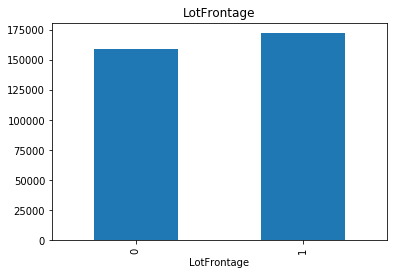

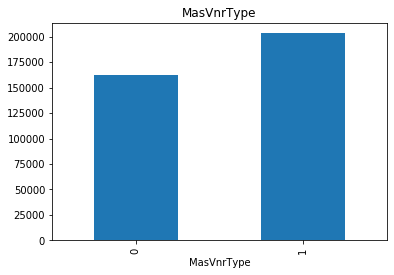

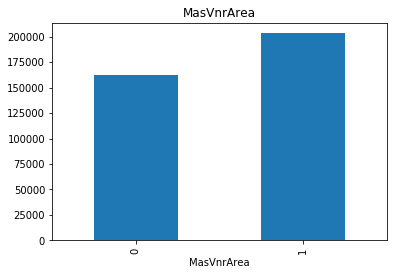

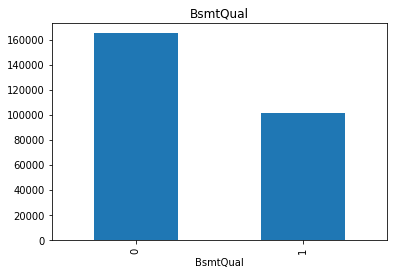

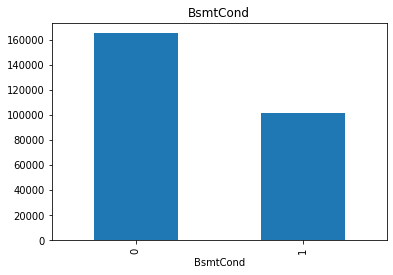

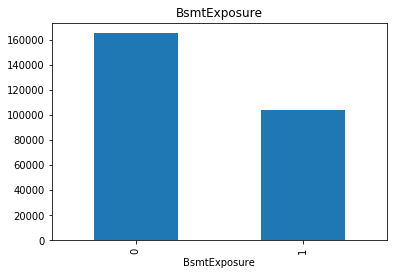

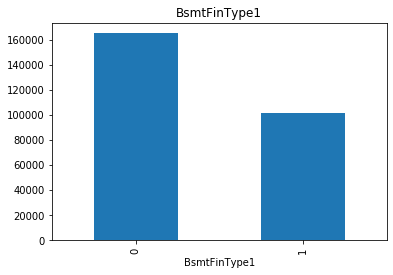

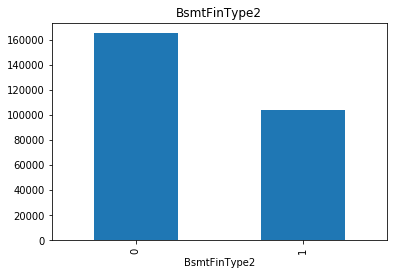

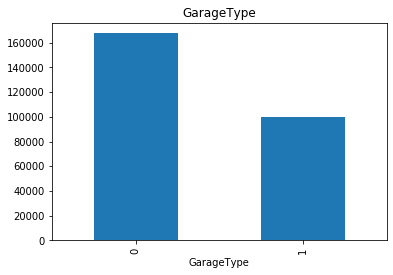

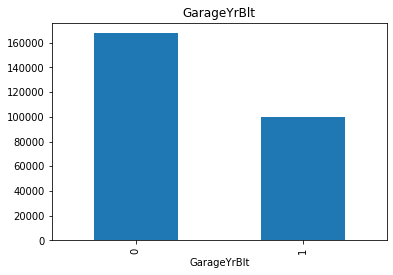

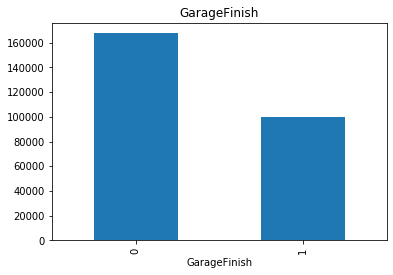

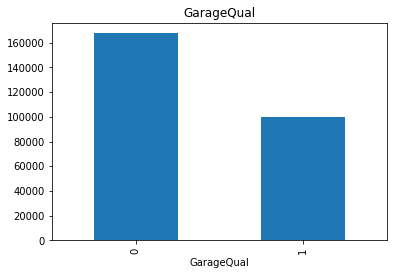

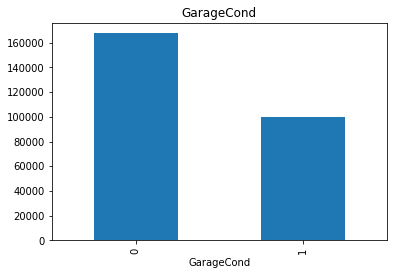

In [27]:
for feature in features_with_na:
    data = train_data.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

__Observation :__

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

## Temporal features

In [28]:
# list of variables that contain year information
year_feature = [feature for feature in train_data if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

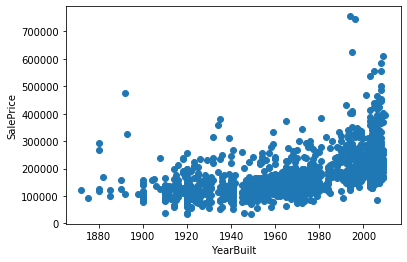

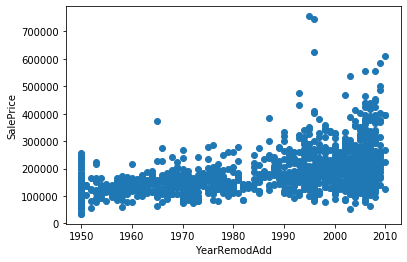

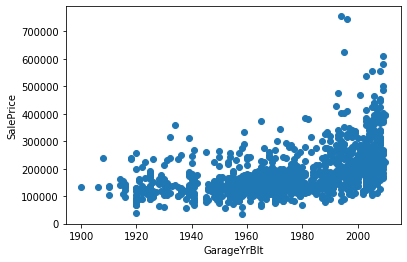

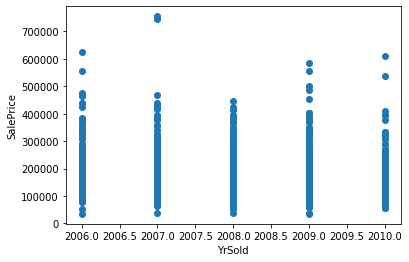

In [29]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
        data =train_data.copy()
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

## Visualizing Categorical Features

In [30]:
## Custom Function for Bar Plots

def barplot(column,df):
    bar_plot1 = sns.countplot(x=column, data=df)
    
    total = len(df[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 400, percentage, ha="center")

#### Univariate Analysis on Categorical Columns

In [31]:
cat = train_data.select_dtypes("category").columns

In [32]:
#for col in cat:
#    barplot(col,train_data)

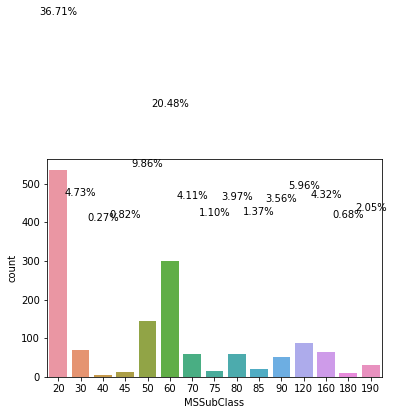

In [33]:
barplot(cat_cols[0],train_data)

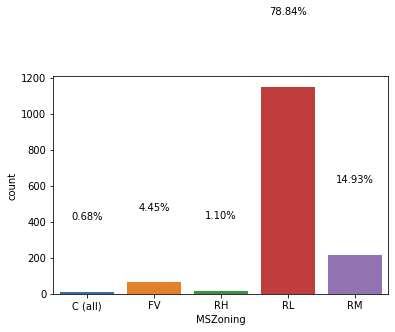

In [34]:
barplot(cat_cols[1],train_data)

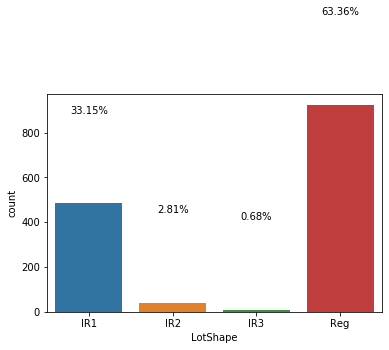

In [35]:
barplot(cat_cols[3],train_data)

In [36]:
train_data['LotShape'] = train_data['LotShape'].replace(['IR2',"IR3"],'IR')  #Binning of categories done
test_data['LotShape'] = test_data['LotShape'].replace(['IR2',"IR3"],'IR')

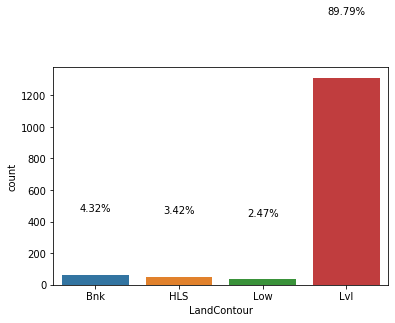

In [37]:
barplot(cat_cols[4],train_data)

In [38]:
train_data['LandContour'] = train_data['LandContour'].replace(['Bnk','HLS',"Low"],'Lv2')  #Binning of categories done
test_data['LandContour'] = test_data['LandContour'].replace(['Bnk','HLS',"Low"],'Lv2') 

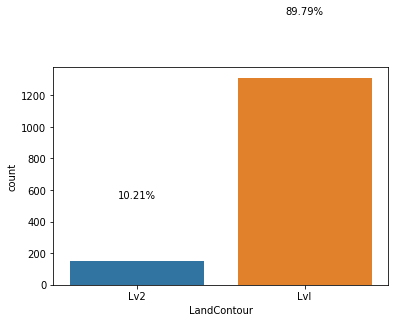

In [39]:
barplot(cat_cols[4],train_data)

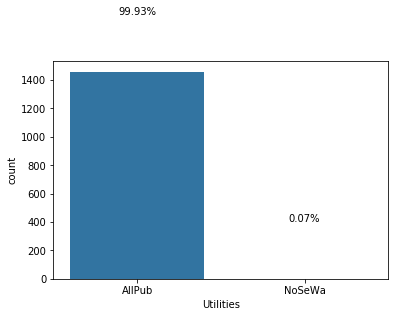

In [40]:
barplot(cat_cols[5],train_data)   #Column can be removed

In [41]:
train_data.drop(["Utilities"], axis=1, inplace=True)
test_data.drop(["Utilities"], axis=1, inplace=True)

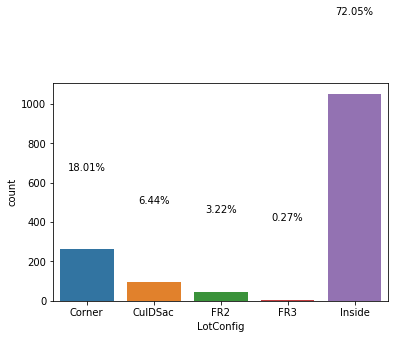

In [42]:
barplot(cat_cols[6],train_data)

In [43]:
#train_data['LotConfig'] = train_data['LotConfig'].replace(['FR2','FR3'],'FR')  #Binning of categories can be done

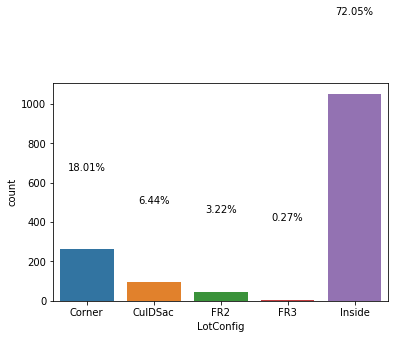

In [44]:
barplot(cat_cols[6],train_data)

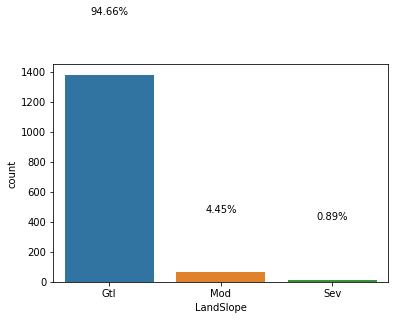

In [45]:
barplot(cat_cols[7],train_data)   #Can be removed

In [46]:
train_data.drop(["LandSlope"], axis=1, inplace=True)
test_data.drop(["LandSlope"], axis=1, inplace=True)

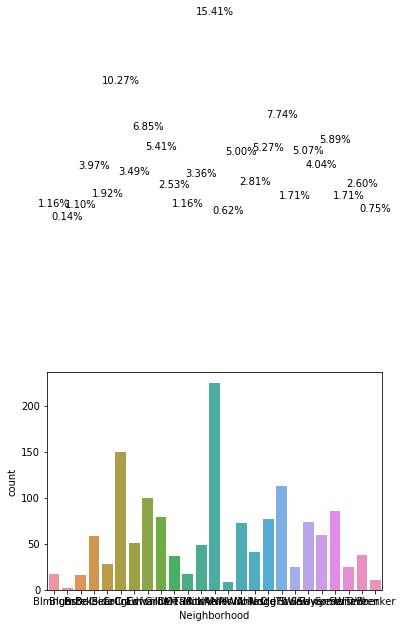

In [47]:
barplot(cat_cols[8],train_data)

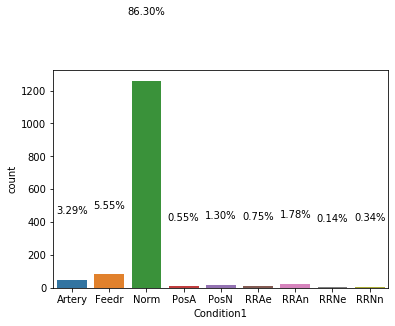

In [48]:
barplot(cat_cols[9],train_data) #Categories can be binned togeather

In [49]:
train_data['Condition1'] = train_data['Condition1'].replace(['Artery','Feedr',"PosA","PosN","RRAe","RRAn","RRNe","RRNn"],'RR') 
test_data['Condition1'] = test_data['Condition1'].replace(['Artery','Feedr',"PosA","PosN","RRAe","RRAn","RRNe","RRNn"],'RR') 

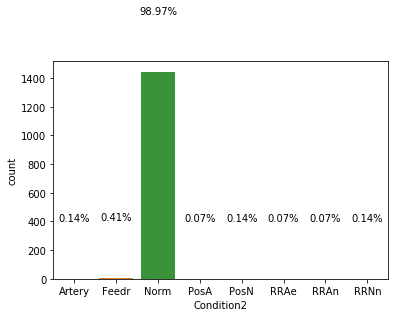

In [50]:
barplot(cat_cols[10],train_data) #Column can be removed

In [51]:
train_data.drop(["Condition2"], axis=1, inplace=True)
test_data.drop(["Condition2"], axis=1, inplace=True)

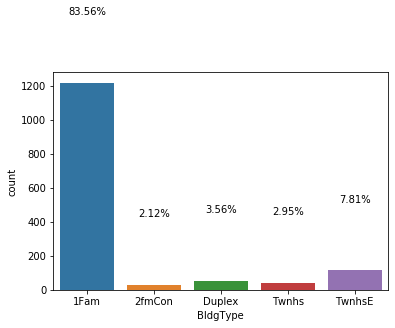

In [52]:
barplot(cat_cols[11],train_data)

In [53]:
#train_data['BldgType'] = train_data['BldgType'].replace(['2fmCon','Duplex',"Twnhs","TwnhsE"],'2Fam') 

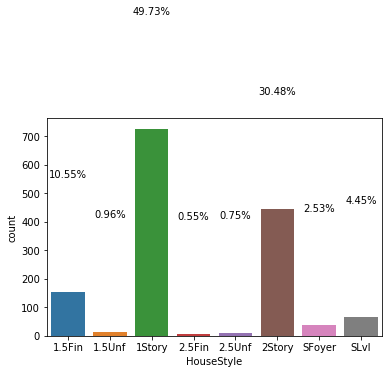

In [54]:
barplot(cat_cols[12],train_data)

In [55]:
train_data['HouseStyle'] = train_data['HouseStyle'].replace(['1.5Unf','2.5Fin',"2.5Unf","SFoyer","SLvl"],'SLvl') 
test_data['HouseStyle'] = test_data['HouseStyle'].replace(['1.5Unf','2.5Fin',"2.5Unf","SFoyer","SLvl"],'SLvl') 

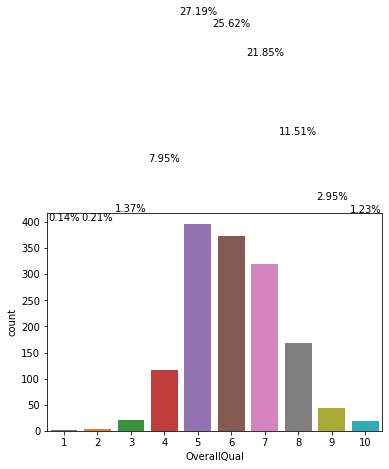

In [56]:
barplot(cat_cols[13],train_data)

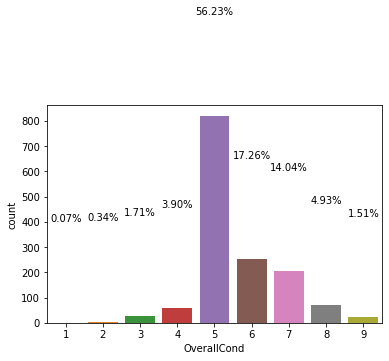

In [57]:
barplot(cat_cols[14],train_data)

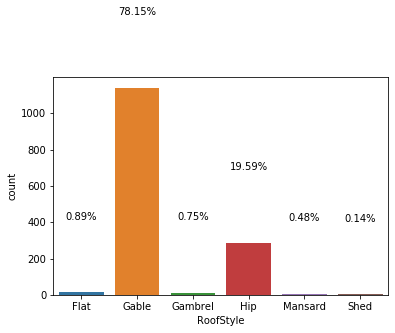

In [58]:
barplot(cat_cols[15],train_data)

In [59]:
train_data['RoofStyle'] = train_data['RoofStyle'].replace(['Flat','Gambrel',"Mansard","Shed","Hip"],'Hip') 
test_data['RoofStyle'] = test_data['RoofStyle'].replace(['Flat','Gambrel',"Mansard","Shed","Hip"],'Hip') 

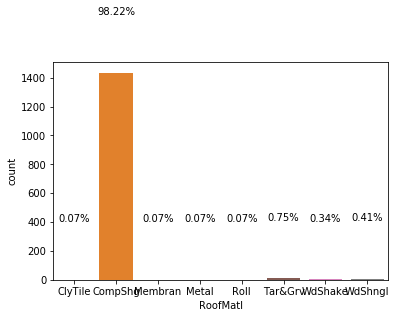

In [60]:
barplot(cat_cols[16],train_data)

In [61]:
train_data.drop(["RoofMatl"], axis=1, inplace=True)
test_data.drop(["RoofMatl"], axis=1, inplace=True)

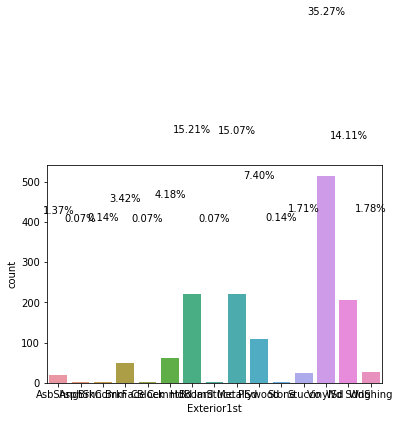

In [62]:
barplot(cat_cols[17],train_data)

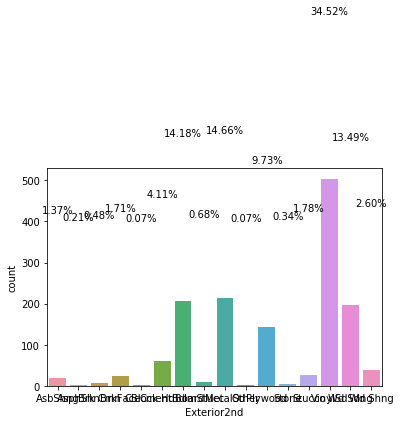

In [63]:
barplot(cat_cols[18],train_data)

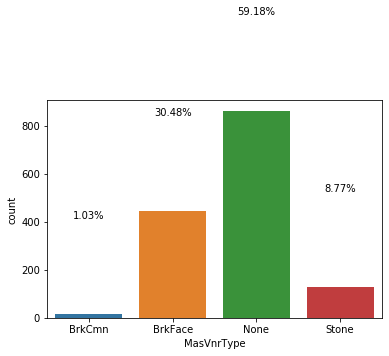

In [64]:
barplot(cat_cols[19],train_data)

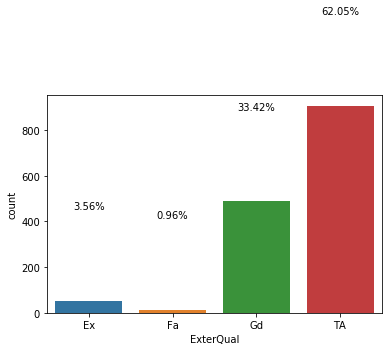

In [65]:
barplot(cat_cols[20],train_data)

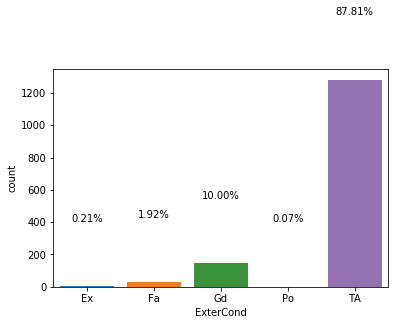

In [66]:
barplot(cat_cols[21],train_data)

In [67]:
train_data['ExterCond'] = train_data['ExterCond'].replace(['Ex','Fa',"Gd","Po"],'Gd')
test_data['ExterCond'] = test_data['ExterCond'].replace(['Ex','Fa',"Gd","Po"],'Gd')

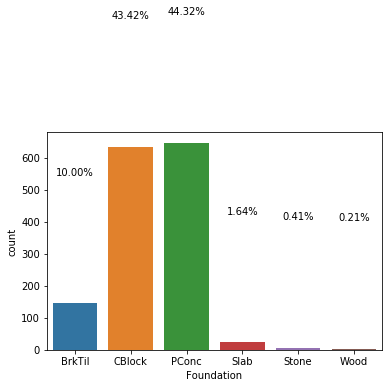

In [68]:
barplot(cat_cols[22],train_data)

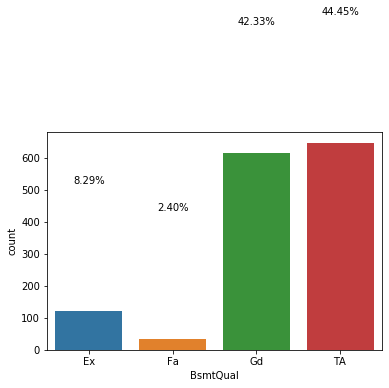

In [69]:
barplot(cat_cols[23],train_data)

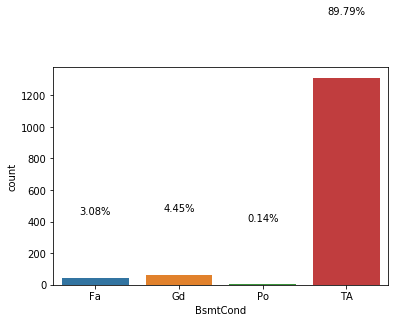

In [70]:
barplot(cat_cols[24],train_data)

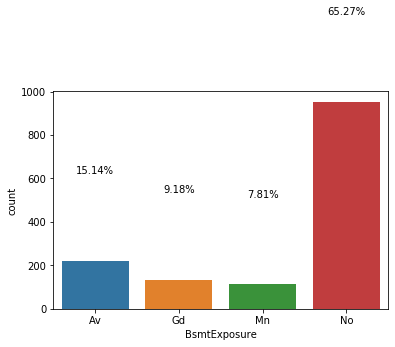

In [71]:
barplot(cat_cols[25],train_data)

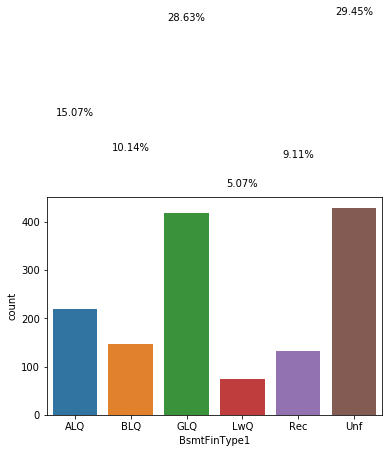

In [72]:
barplot(cat_cols[26],train_data)

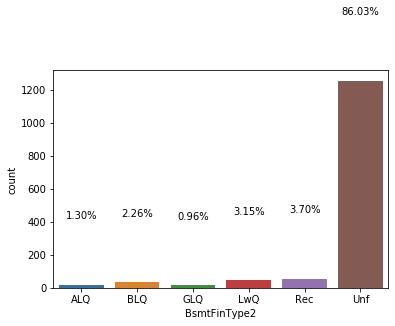

In [73]:
barplot(cat_cols[27],train_data)

In [74]:
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].replace(['ALQ','BLQ',"GLQ","LwQ","Rec"],'Rec') 
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].replace(['ALQ','BLQ',"GLQ","LwQ","Rec"],'Rec') 

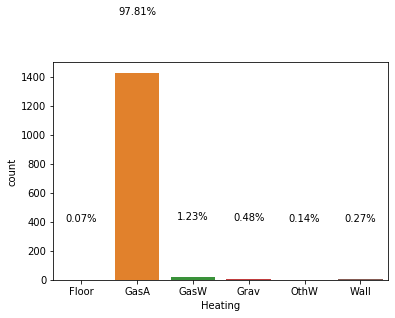

In [75]:
barplot(cat_cols[28],train_data)

In [76]:
train_data.drop(["Heating"], axis=1, inplace=True)
test_data.drop(["Heating"], axis=1, inplace=True)

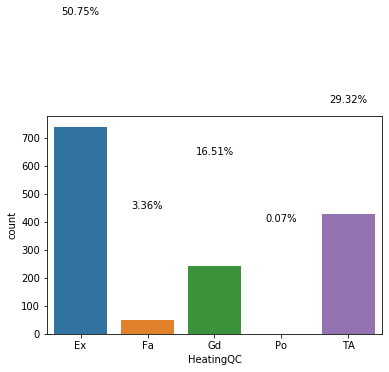

In [77]:
barplot(cat_cols[29],train_data)

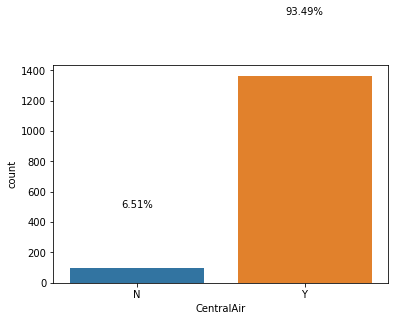

In [78]:
barplot(cat_cols[30],train_data)

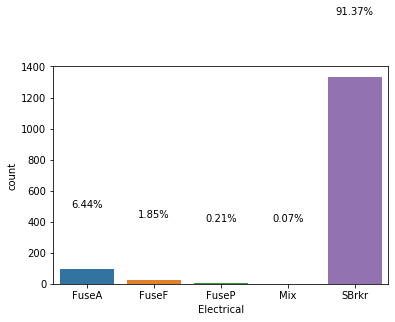

In [79]:
barplot(cat_cols[31],train_data)

In [80]:
train_data['Electrical'] = train_data['Electrical'].replace(['FuseF','FuseP',"Mix","FuseA"],'FuseA') 
test_data['Electrical'] = test_data['Electrical'].replace(['FuseF','FuseP',"Mix","FuseA"],'FuseA') 

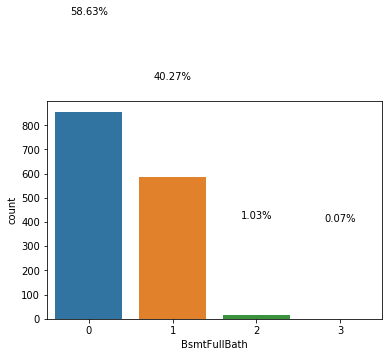

In [81]:
barplot(cat_cols[32],train_data)

In [82]:
train_data['BsmtFullBath'] = train_data['BsmtFullBath'].replace(['1','2',"3"],'1')
test_data['BsmtFullBath'] = test_data['BsmtFullBath'].replace(['1','2',"3"],'1') 

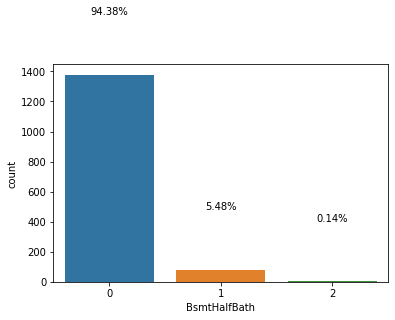

In [83]:
barplot(cat_cols[33],train_data)

In [84]:
train_data.drop(["BsmtHalfBath"], axis=1, inplace=True)
test_data.drop(["BsmtHalfBath"], axis=1, inplace=True)

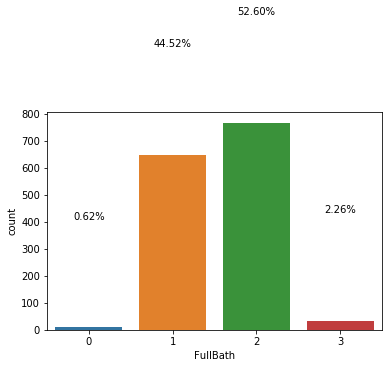

In [85]:
barplot(cat_cols[34],train_data)

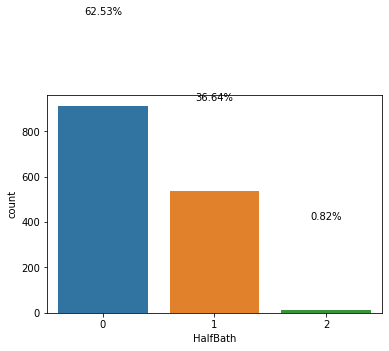

In [86]:
barplot(cat_cols[35],train_data)

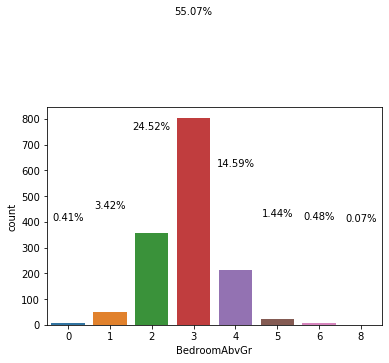

In [87]:
barplot(cat_cols[36],train_data)

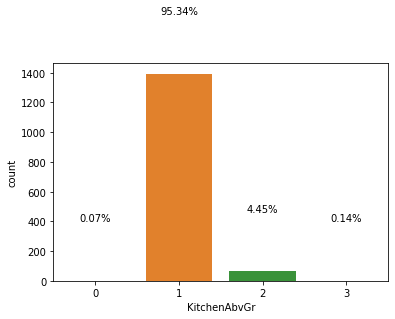

In [88]:
barplot(cat_cols[37],train_data)

In [89]:
train_data['KitchenAbvGr'] = train_data['KitchenAbvGr'].replace(['0','2',"3"],'2') 
test_data['KitchenAbvGr'] = test_data['KitchenAbvGr'].replace(['0','2',"3"],'2') 

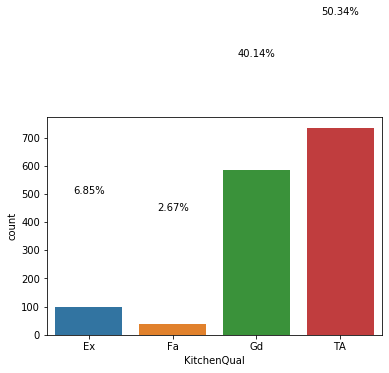

In [90]:
barplot(cat_cols[38],train_data)

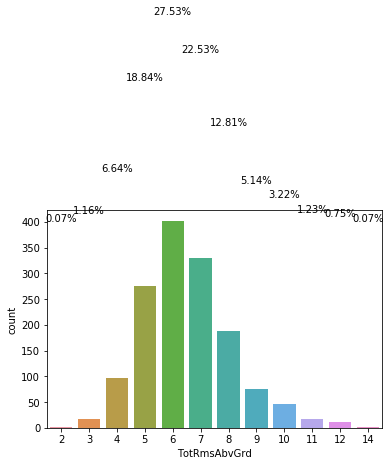

In [91]:
barplot(cat_cols[39],train_data)

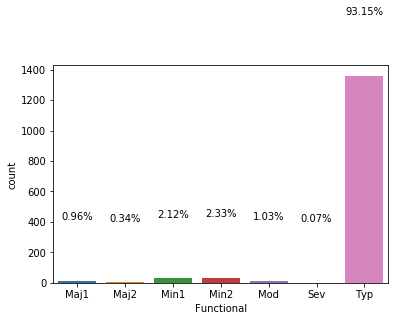

In [92]:
barplot(cat_cols[40],train_data)

In [93]:
train_data.drop(["Functional"], axis=1, inplace=True)
test_data.drop(["Functional"], axis=1, inplace=True)

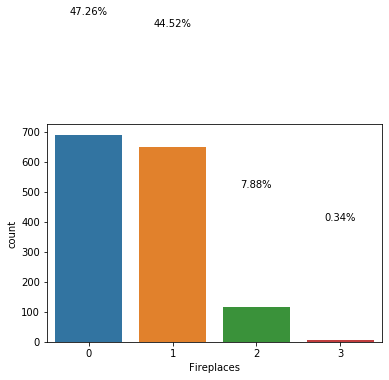

In [94]:
barplot(cat_cols[41],train_data)

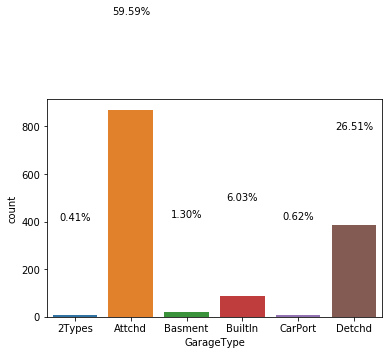

In [95]:
barplot(cat_cols[42],train_data)

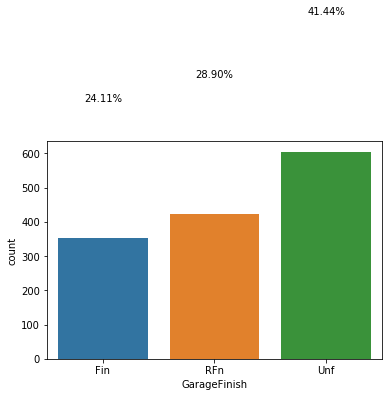

In [96]:
barplot(cat_cols[43],train_data)

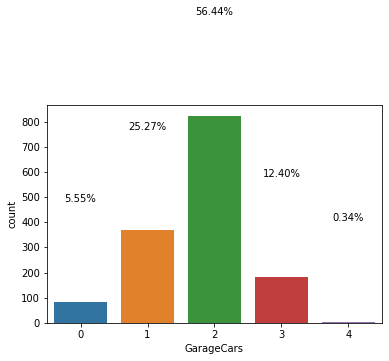

In [97]:
barplot(cat_cols[44],train_data)

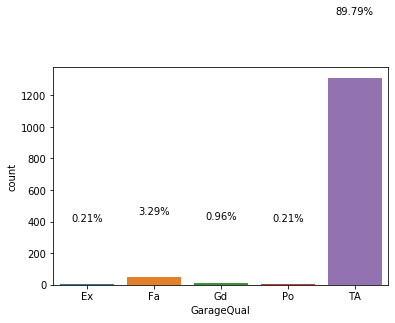

In [98]:
barplot(cat_cols[45],train_data)

In [99]:
train_data['GarageQual'] = train_data['GarageQual'].replace(['Ex','Fa',"Gd","Po"],'Fa') 
test_data['GarageQual'] = test_data['GarageQual'].replace(['Ex','Fa',"Gd","Po"],'Fa') 

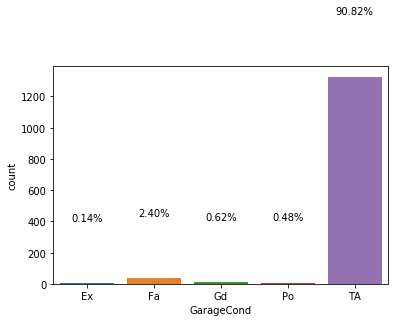

In [100]:
barplot(cat_cols[46],train_data)

In [101]:
train_data.drop(["GarageCond"], axis=1, inplace=True)
test_data.drop(["GarageCond"], axis=1, inplace=True)

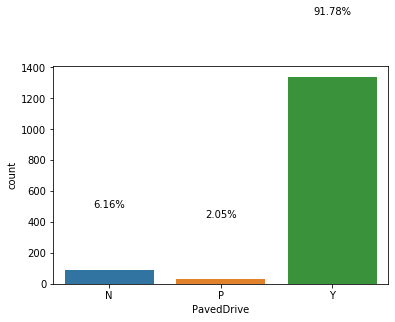

In [102]:
barplot(cat_cols[47],train_data)

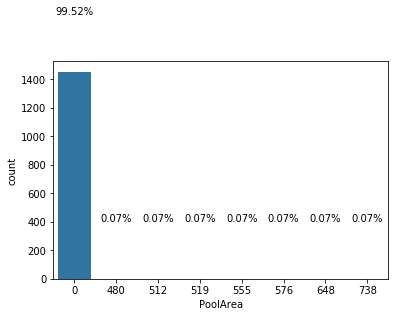

In [103]:
barplot(cat_cols[48],train_data)

In [104]:
train_data.drop(["PoolArea"], axis=1, inplace=True)
test_data.drop(["PoolArea"], axis=1, inplace=True)

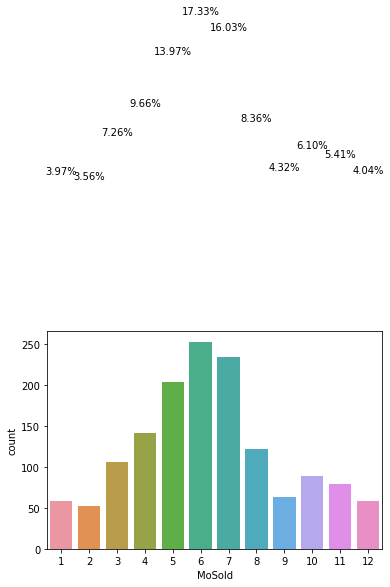

In [105]:
barplot(cat_cols[49],train_data)

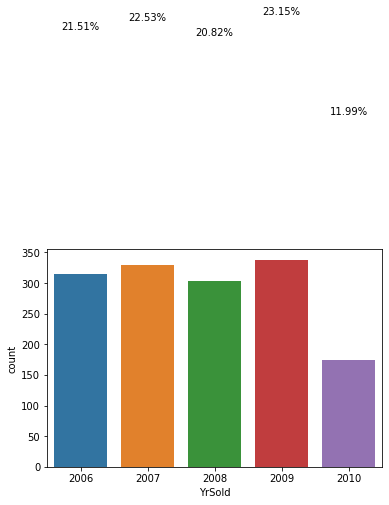

In [106]:
barplot(cat_cols[50],train_data)

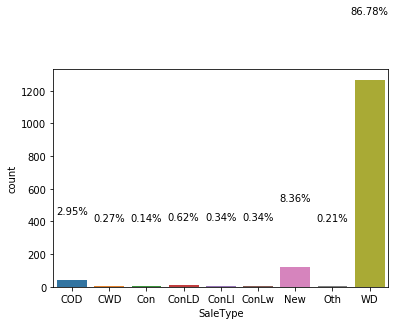

In [107]:
barplot(cat_cols[51],train_data)

In [108]:
train_data['SaleType'] = train_data['SaleType'].replace(['Cwd','Con',"ConLD","ConLI","ConLw","Oth"],'New') 
test_data['SaleType'] = test_data['SaleType'].replace(['Cwd','Con',"ConLD","ConLI","ConLw","Oth"],'New') 

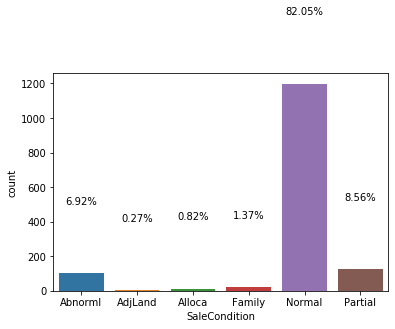

In [109]:
barplot(cat_cols[52],train_data)

In [110]:
train_data['SaleCondition'] = train_data['SaleCondition'].replace(['AdjLand','Alloca',"Family"],'Family') 
test_data['SaleCondition'] = test_data['SaleCondition'].replace(['AdjLand','Alloca',"Family"],'Family') 

In [111]:
cat_cols = train_data.select_dtypes("category").columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

### Analysing Categorical Attributes wrt Target Variable

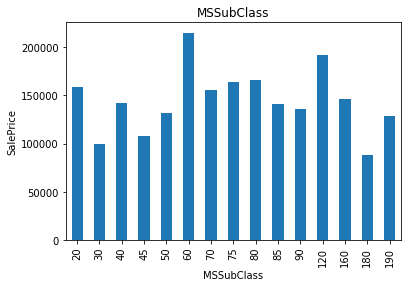

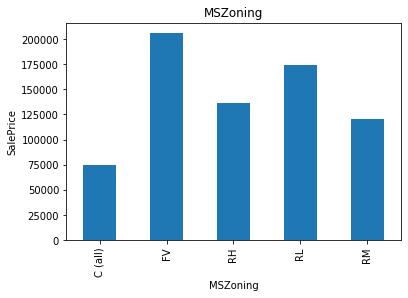

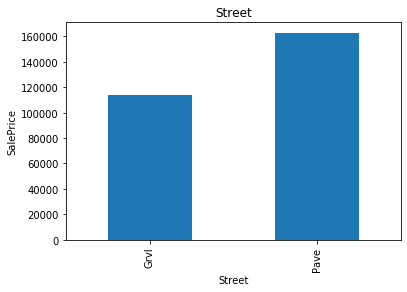

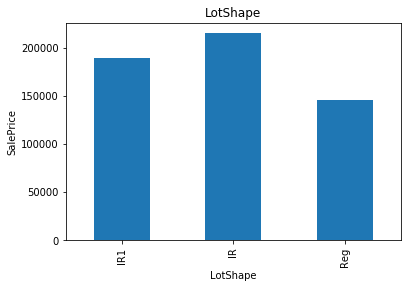

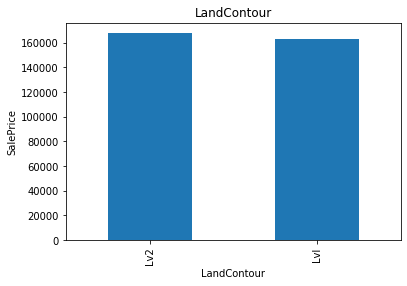

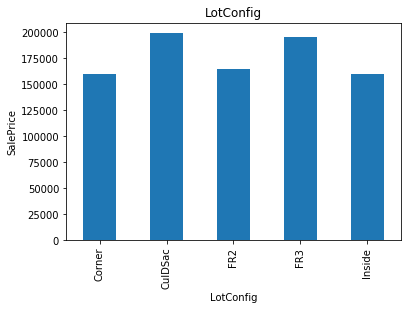

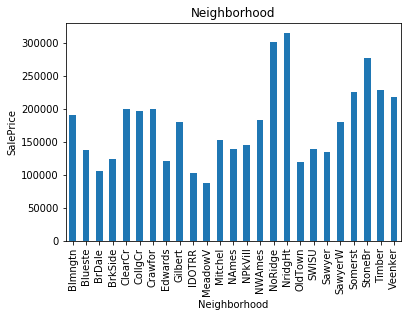

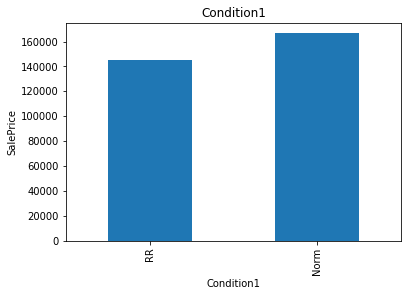

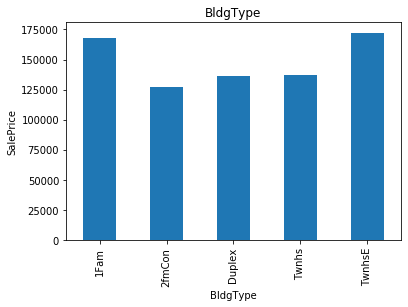

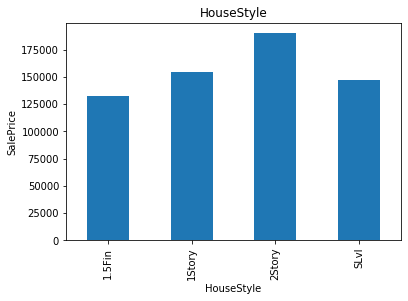

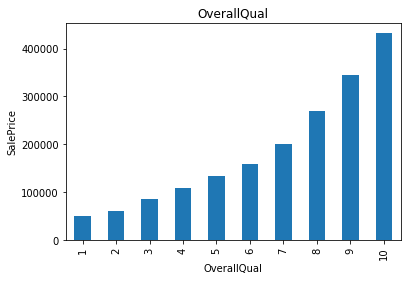

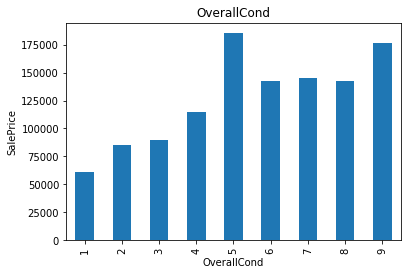

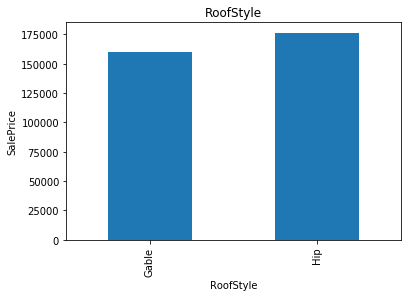

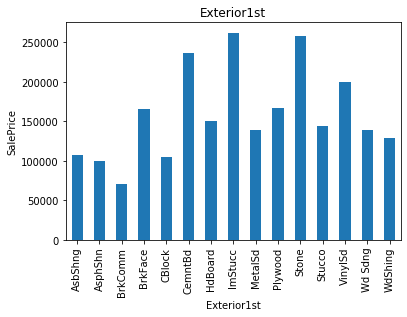

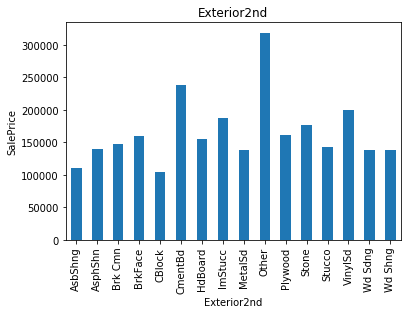

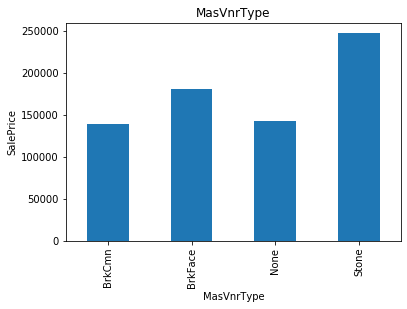

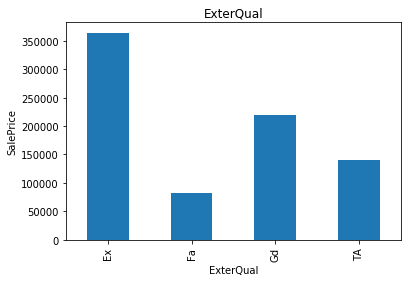

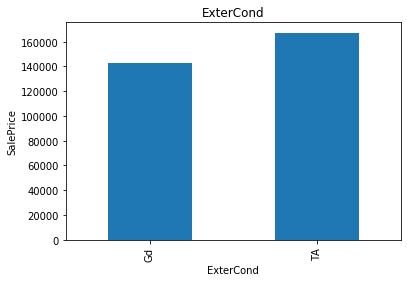

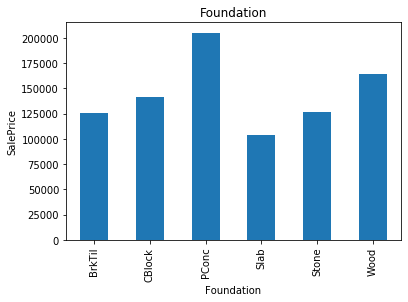

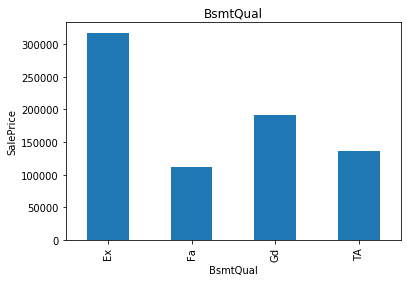

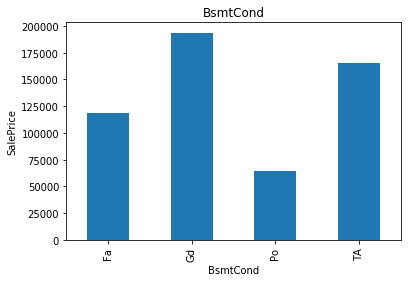

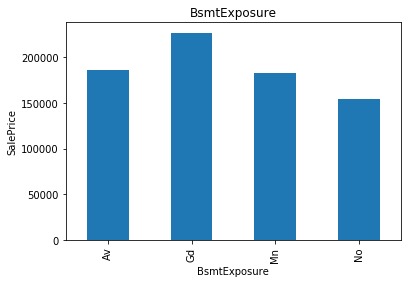

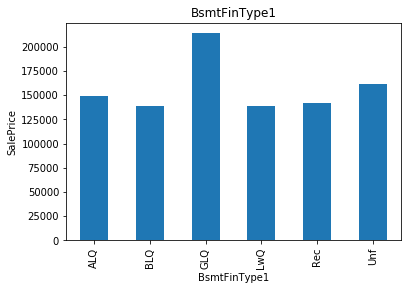

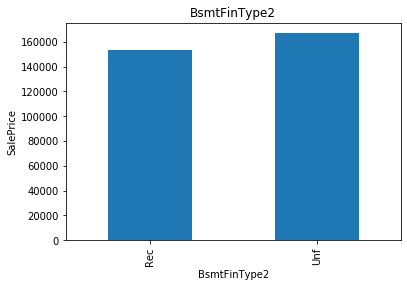

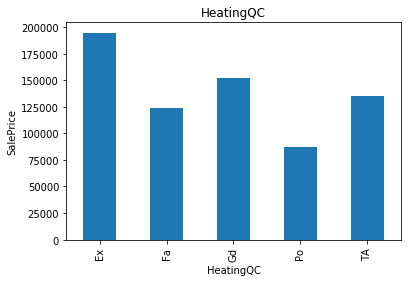

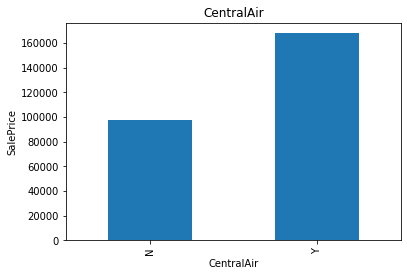

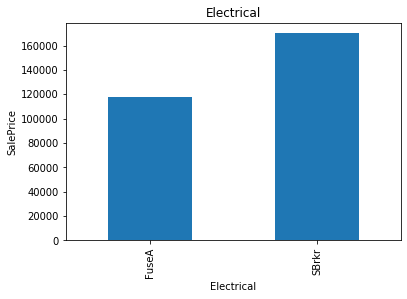

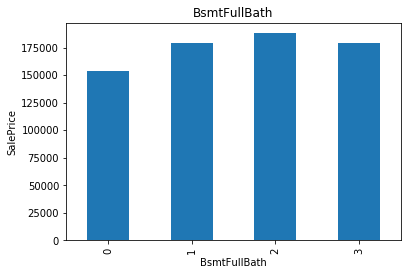

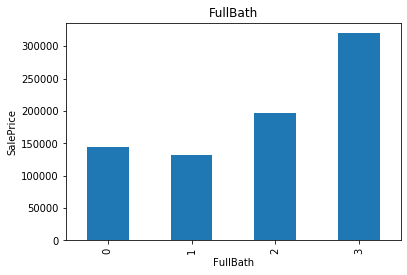

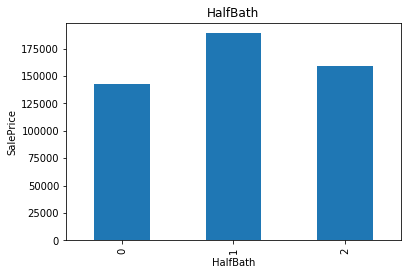

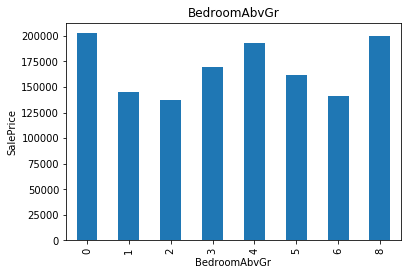

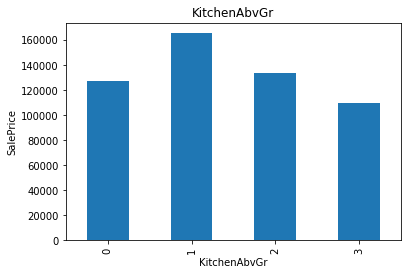

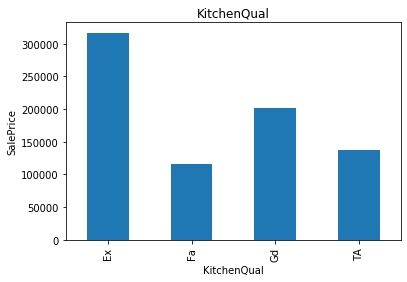

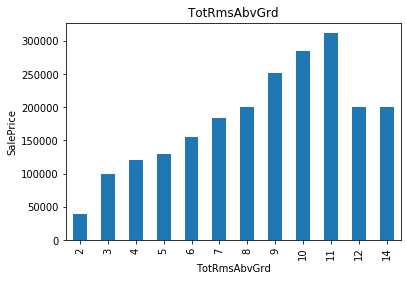

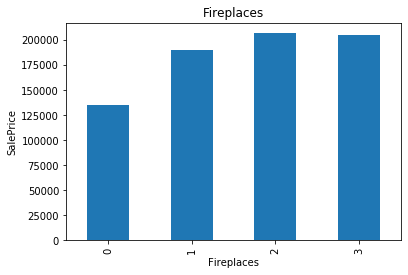

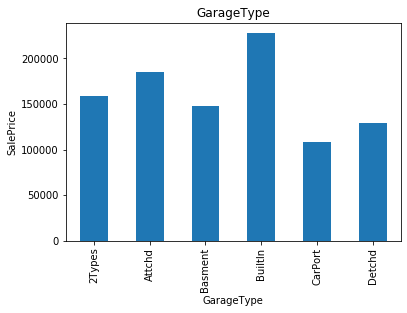

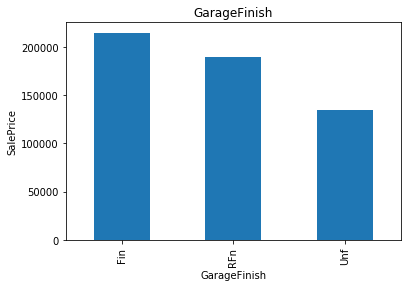

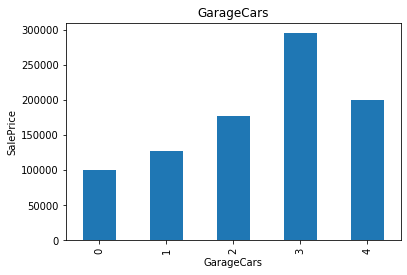

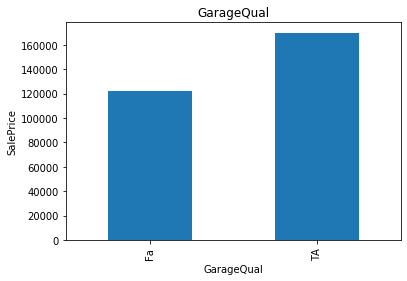

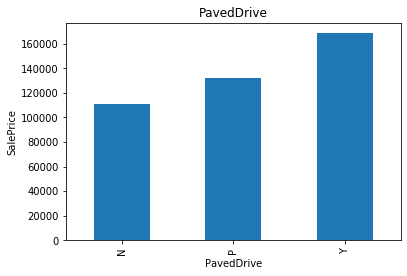

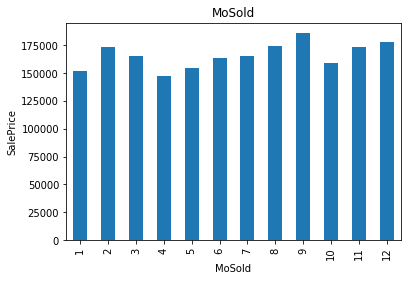

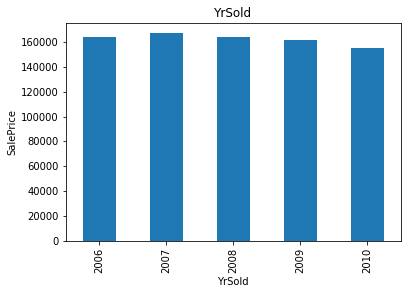

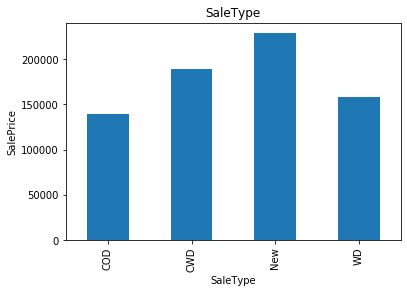

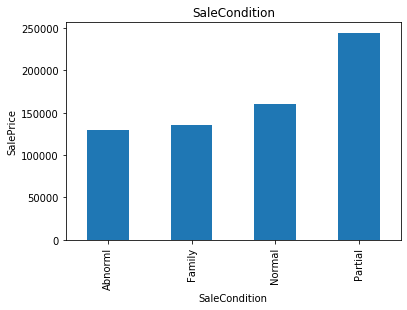

In [112]:
## Find out the relationship between categorical variable and dependent feature SalesPrice
for feature in cat_cols:
    data=train_data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Analysing Numerical features

In [113]:
train_data[num_cols].dtypes

LotFrontage      float64
LotArea            int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
GarageYrBlt      float64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
MiscVal            int64
SalePrice          int64
dtype: object

In [114]:
### Function for displaying Histogram Plot
    
def hist(data, column):
    plt.figure(figsize=(10, 5))
    plt.hist(data[column])
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title("Distribution Plot")

    plt.show()

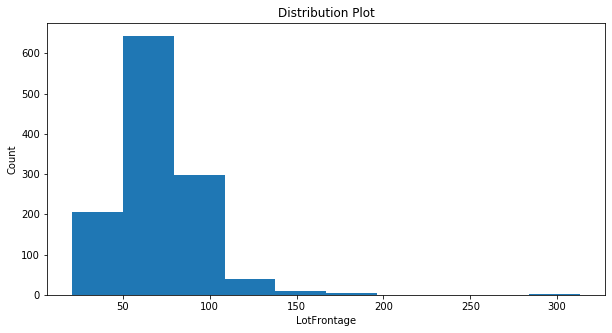

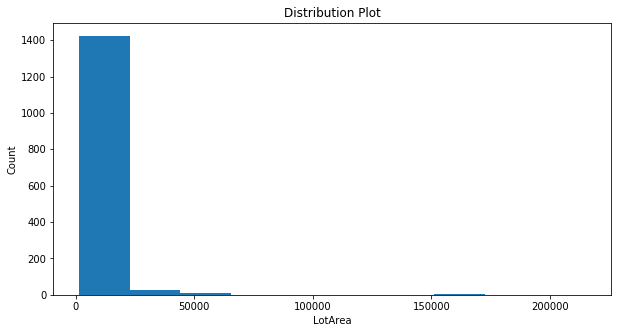

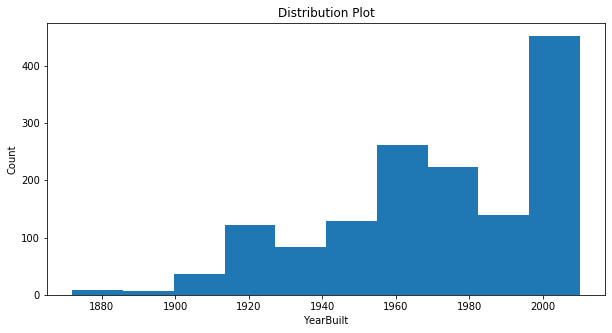

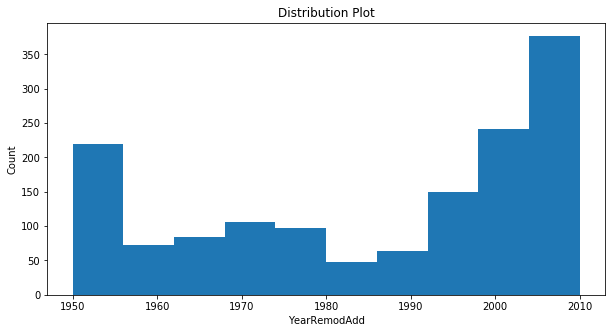

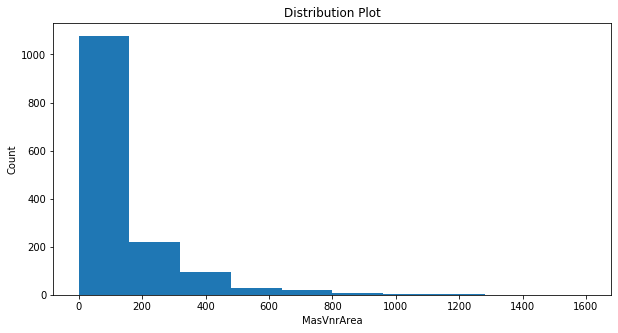

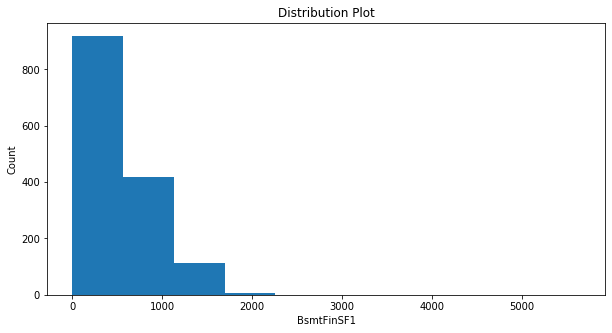

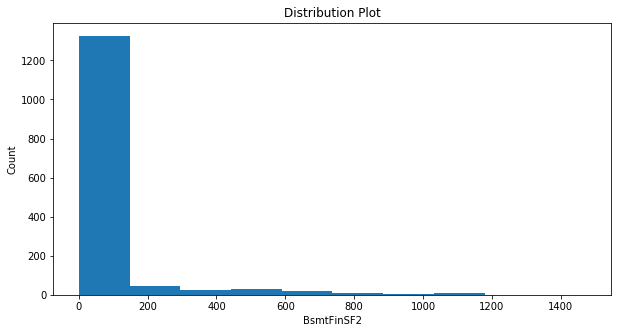

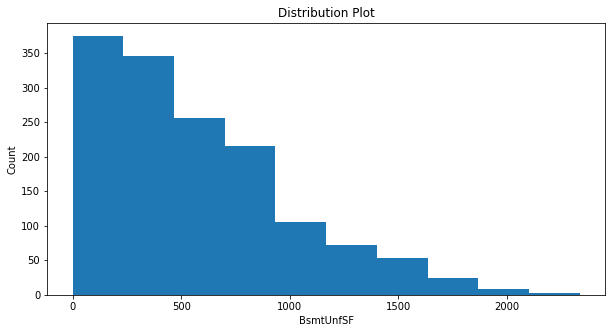

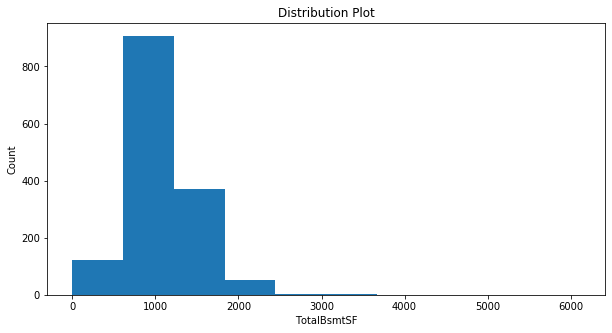

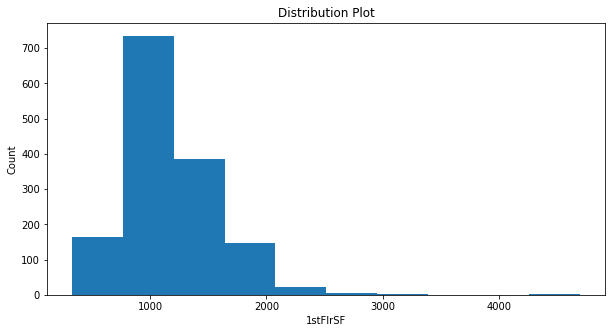

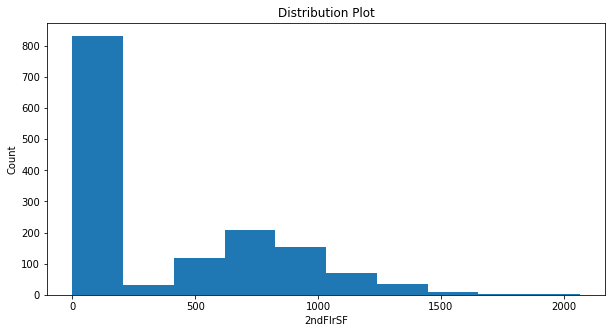

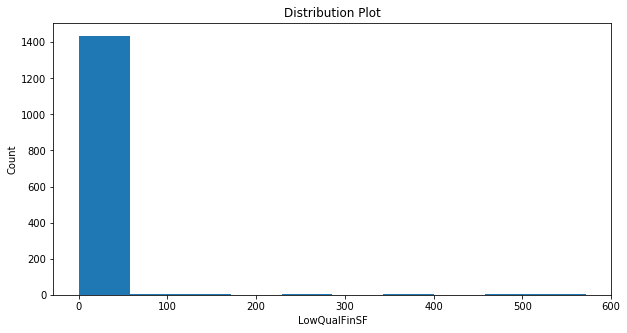

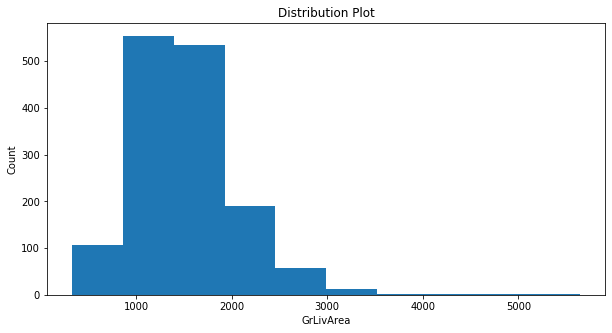

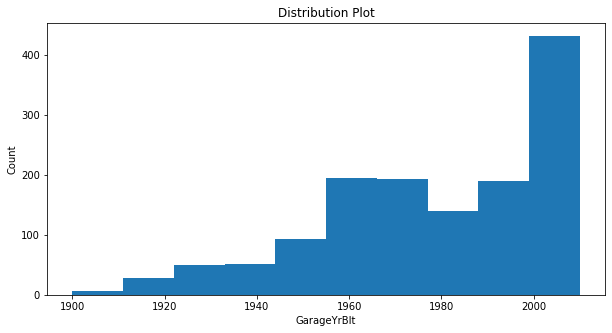

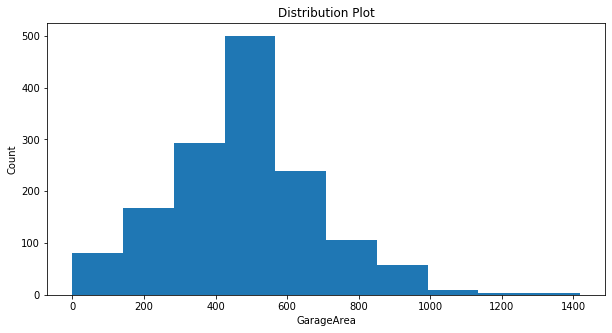

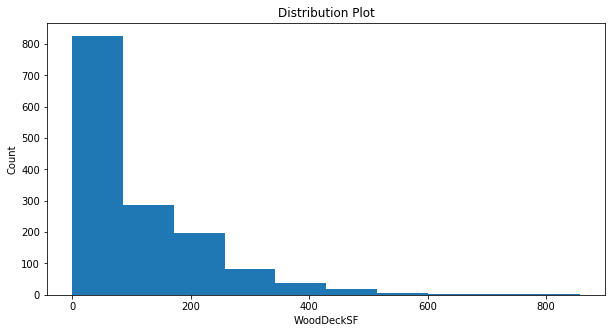

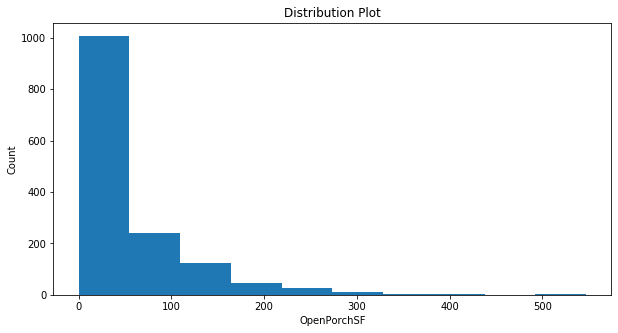

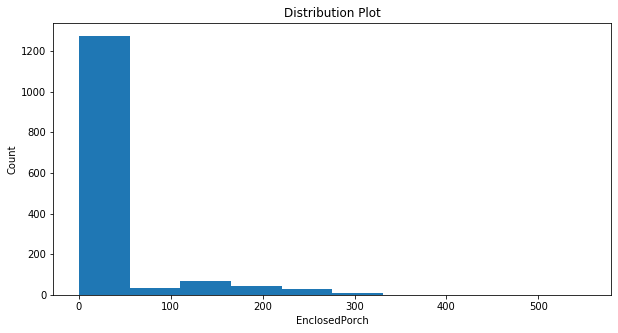

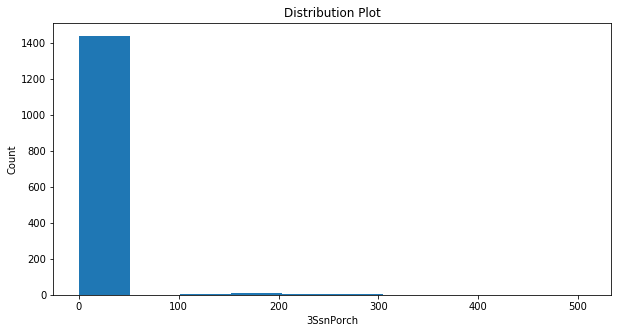

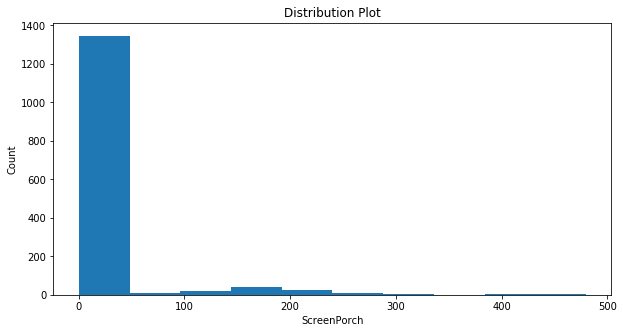

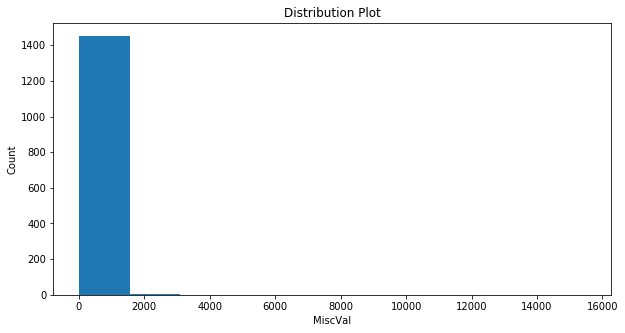

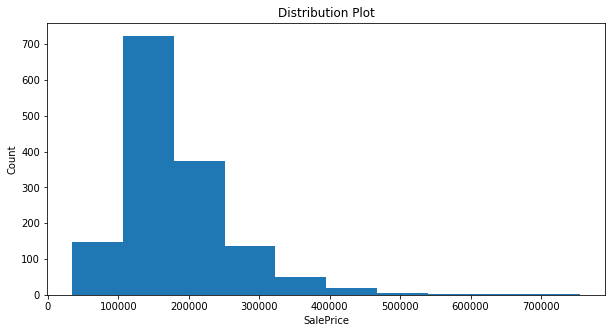

In [115]:
## Histogram plots for getting distribution of numerical features

for col in num_cols:
    hist(train_data,col)

### Dropping Numerical columns Showing almost zero variance

In [116]:
train_data.drop(["BsmtFinSF2","LowQualFinSF","EnclosedPorch","3SsnPorch","ScreenPorch","MiscVal"], axis=1, inplace=True)
test_data.drop(["BsmtFinSF2","LowQualFinSF","EnclosedPorch","3SsnPorch","ScreenPorch","MiscVal"], axis=1, inplace=True)

In [117]:
train_data.shape

(1460, 60)

In [118]:
num_cols = train_data.select_dtypes(["int64","float64"]).columns
num_cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice'],
      dtype='object')

In [119]:
num_features = train_data[['LotFrontage', 'LotArea','MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

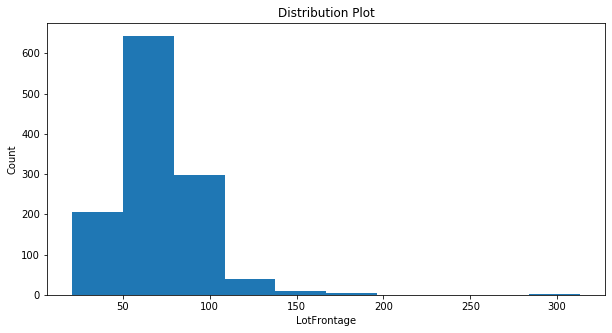

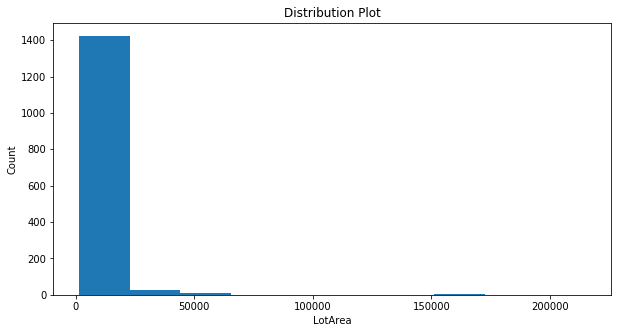

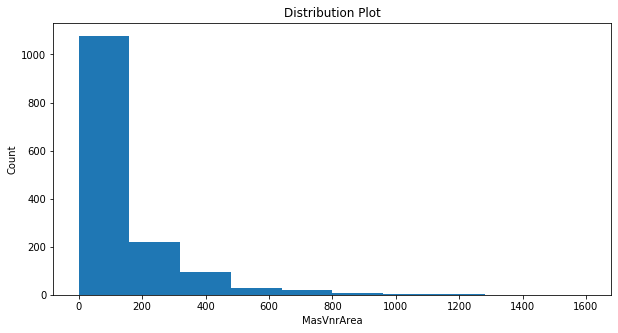

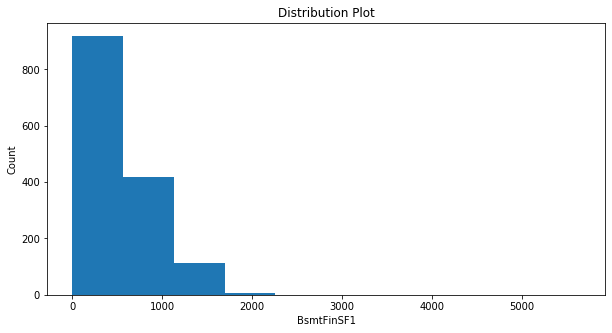

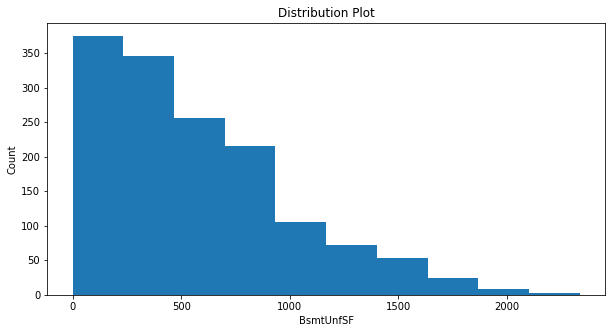

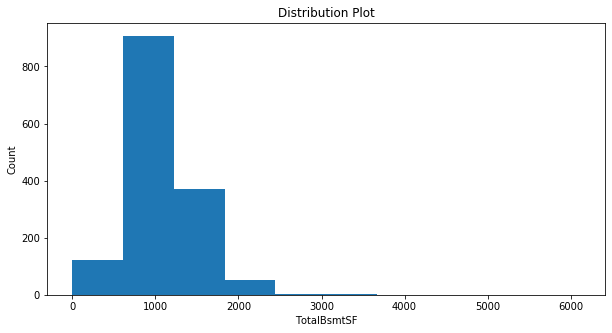

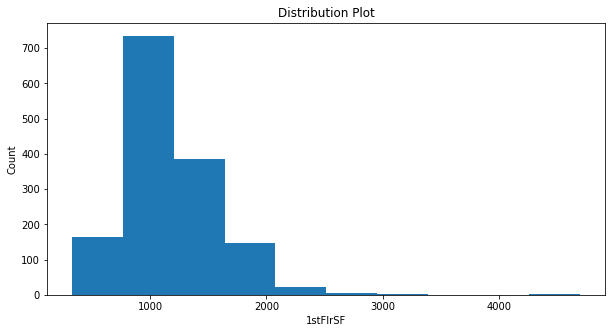

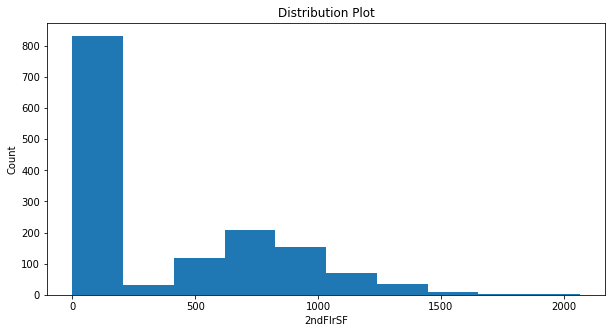

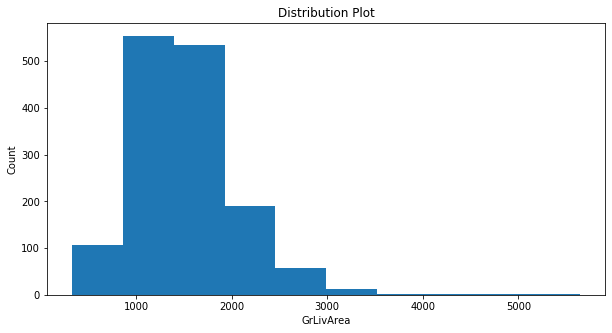

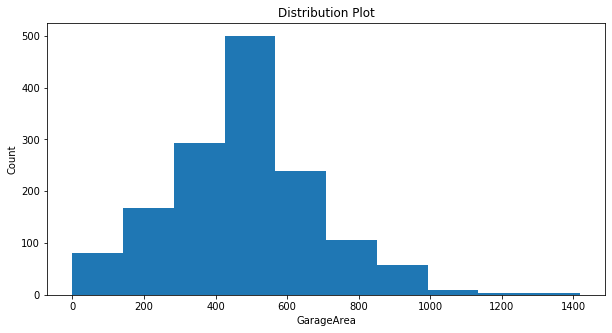

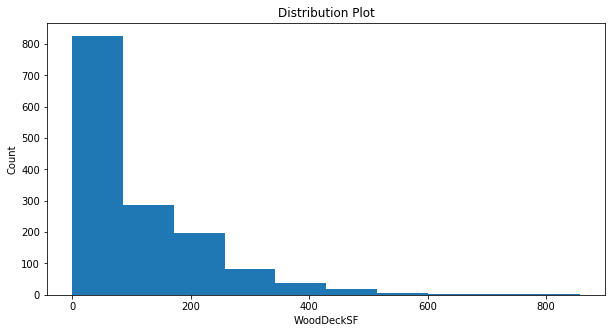

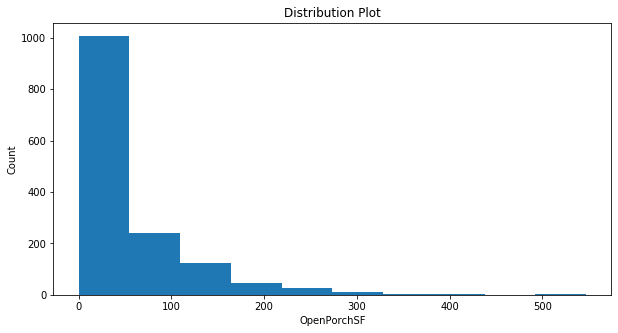

In [120]:
for col in num_features:
    hist(train_data,col)

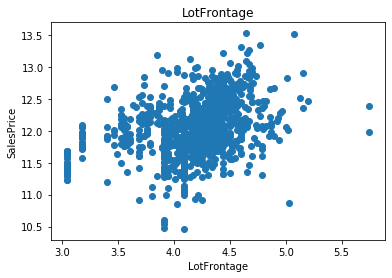

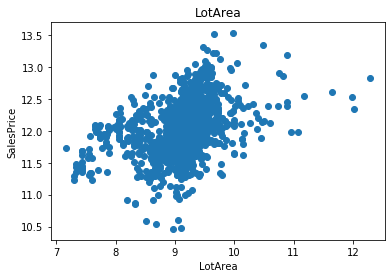

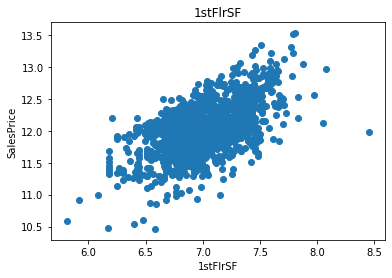

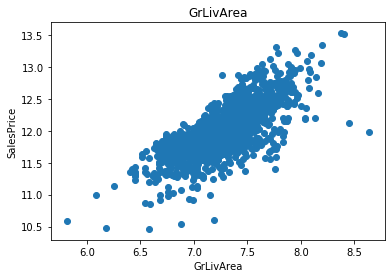

In [121]:
## We will be using logarithmic transformation
for feature in num_features:
    data=train_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()


In [122]:
## Lograthmic Function for test_data
for feature in num_features:
    data1 = test_data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature]=np.log(data1[feature])

## Outliers

In [123]:
## Removing Outliers
for x in num_features:
    median = data[x].median()
    std = data[x].std()
    outliers = (data[x] - median).abs() > 1.5*std
    data.loc[outliers,x] = np.nan
    data[x].fillna(median, inplace=True)

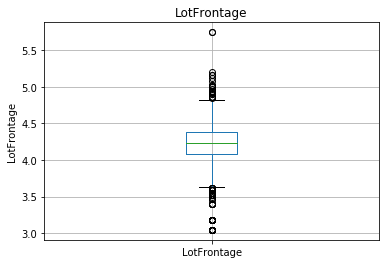

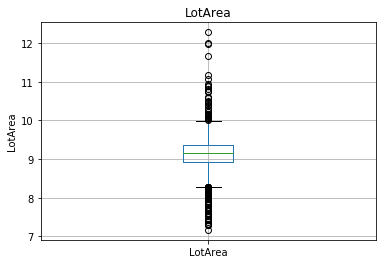

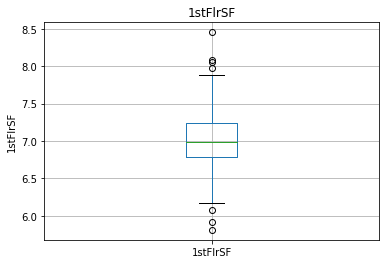

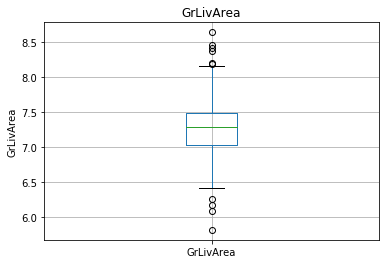

In [124]:
for feature in num_features:
    data=train_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Skewness Value with Distplots

LotFrontage
nan


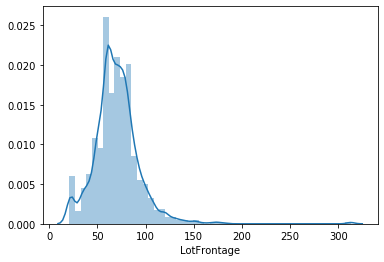

LotArea
12.195142125084478


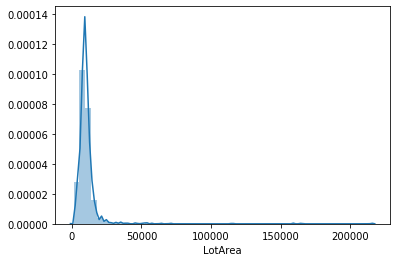

MasVnrArea
nan


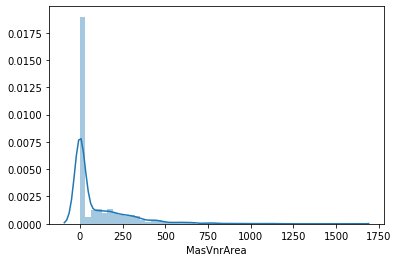

BsmtFinSF1
1.6837708962341815


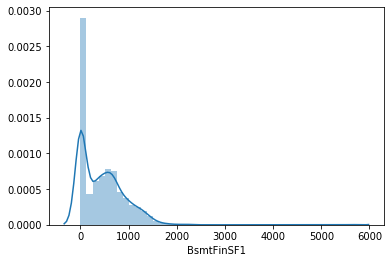

BsmtUnfSF
0.9193227015582005


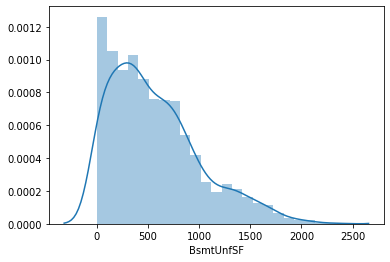

TotalBsmtSF
1.522688086978629


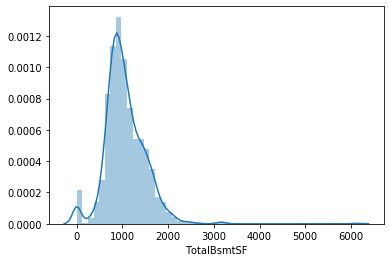

1stFlrSF
1.3753417421837937


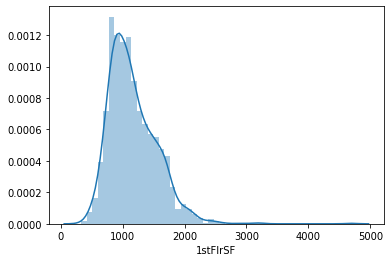

2ndFlrSF
0.8121942731961613


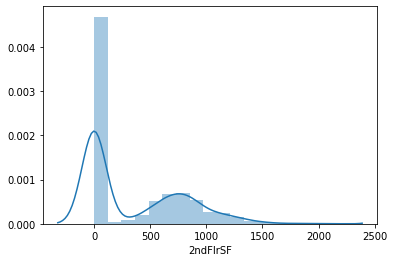

GrLivArea
1.365155954773434


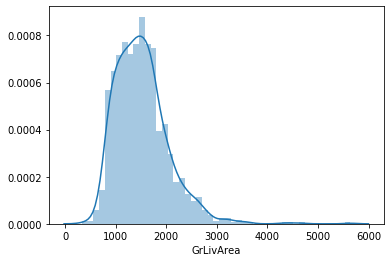

GarageArea
0.1797959420587727


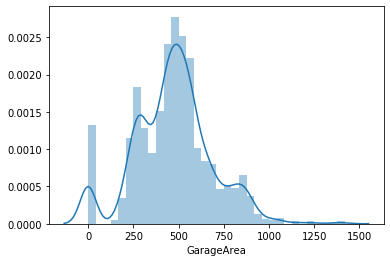

WoodDeckSF
1.5397916998042025


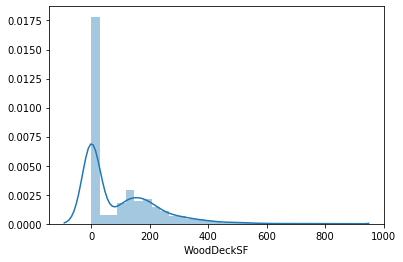

OpenPorchSF
2.361911928568972


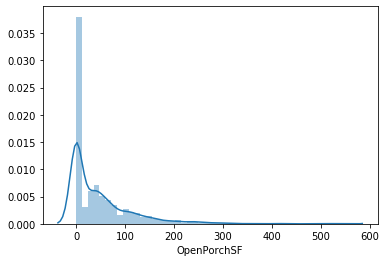

In [125]:
#from scipy.stats import skew 
for col in num_features:
    print(col)
    print(skew(num_features[col]))
    
    plt.figure()
    sns.distplot(num_features[col])
    plt.show()

# Feature Engineering

In [126]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [127]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,TA,Y,0,61,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Veenker,RR,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,TA,Y,298,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,1,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,TA,Y,0,42,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,Y,SBrkr,961,756,1717,1,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,TA,Y,0,35,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,TA,Y,192,84,12,2008,WD,Normal,250000


In [128]:
## Converting datatype for feature engg:
train_data['YrSold'] = train_data['YrSold'].astype('int64')
train_data['YearBuilt'] = train_data['YearBuilt'].astype('int64')
train_data['YearRemodAdd'] = train_data['YearRemodAdd'].astype('int64')
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].astype('category')

test_data['YrSold'] = test_data['YrSold'].astype('int64')
test_data['YearBuilt'] = test_data['YearBuilt'].astype('int64')
test_data['YearRemodAdd'] = test_data['YearRemodAdd'].astype('int64')
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].astype('category')

__NEW FEATURE CREATED__

In [129]:
train_data['current_yr'] = 2020
train_data['YearBuilt_new'] = train_data['current_yr'] - train_data['YearBuilt']
train_data['Year_to_sell'] = train_data['YrSold'] - train_data['YearBuilt']
train_data['Year_modified'] = train_data['YrSold'] - train_data['YearRemodAdd']

test_data['current_yr'] = 2020
test_data['YearBuilt_new'] = test_data['current_yr'] - test_data['YearBuilt']
test_data['Year_to_sell'] = test_data['YrSold'] - test_data['YearBuilt']
test_data['Year_modified'] = test_data['YrSold'] - test_data['YearRemodAdd']

##Another way to feat engg
train_data['current_yr'] = 2020
train_data['YrSold_new'] = train_data['current_yr'] - train_data['YrSold']
train_data['YearBuilt_new'] = train_data["current_yr"] - train_data['YearBuilt']
train_data['YearRemodAdd_new'] = train_data["current_yr"] - train_data['YearRemodAdd']
#train_data['GarageYrBlt_new'] = train_data["current_yr"] - train_data['GarageYrBlt']

test_data['current_yr'] = 2020
test_data['YrSold_new'] = test_data['current_yr'] - test_data['YrSold']
test_data['YearBuilt_new'] = test_data["current_yr"] - test_data['YearBuilt']
test_data['YearRemodAdd_new'] = test_data["current_yr"] - test_data['YearRemodAdd']

In [130]:
# Dropping Unnecessary columns
train_data = train_data.drop(["YrSold","YearBuilt","YearRemodAdd","current_yr"],axis=1)
test_data = test_data.drop(["YrSold","YearBuilt","YearRemodAdd","current_yr"],axis=1)

In [131]:
train_data['YearBuilt_new'] = train_data['YearBuilt_new'].astype('int64')
train_data['Year_to_sell'] = train_data['Year_to_sell'].astype('int64')
train_data['Year_modified'] = train_data['Year_modified'].astype('int64')

test_data['YearBuilt_new'] = test_data['YearBuilt_new'].astype('int64')
test_data['Year_to_sell'] = test_data['Year_to_sell'].astype('int64')
test_data['Year_modified'] = test_data['Year_modified'].astype('int64')

# Split the data into train and test

In [132]:
y=train_data["SalePrice"]
X=train_data.drop('SalePrice', axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=123)

In [133]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(1095, 59)
(365, 59)
(1095,)
(365,)


## Split the attributes into numerical and categorical types

In [134]:
num_cols_new=X_train._get_numeric_data().columns
num_cols_new

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'YearBuilt_new', 'Year_to_sell',
       'Year_modified'],
      dtype='object')

In [135]:
cat_attr_new = X_train.select_dtypes('category').columns
cat_attr_new

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageQual', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

## Checking for missing values 

In [136]:
print(X_train.isnull().sum())

MSSubClass         0
MSZoning           0
LotFrontage      174
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType         4
MasVnrArea         4
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          28
BsmtCond          28
BsmtExposure      29
BsmtFinType1      28
BsmtFinSF1         0
BsmtFinType2      28
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageCars   

In [137]:
print(X_val.isnull().sum())

MSSubClass        0
MSZoning          0
LotFrontage      85
LotArea           0
Street            0
LotShape          0
LandContour       0
LotConfig         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrType        4
MasVnrArea        4
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          9
BsmtCond          9
BsmtExposure      9
BsmtFinType1      9
BsmtFinSF1        0
BsmtFinType2     10
BsmtUnfSF         0
TotalBsmtSF       0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Fireplaces        0
GarageType       17
GarageYrBlt      17
GarageFinish     17
GarageCars        0
GarageArea        0
GarageQual       17


In [138]:
test_data.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
RoofStyle          0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtUnfSF          1
TotalBsmtSF        1
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        1
TotRmsAbvGrd       0
Fireplaces         0
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars   

# Preparation for Model buillding

## Imputing missing values with median

In [139]:
imputer = SimpleImputer(strategy='median')

imputer = imputer.fit(X_train[num_cols_new])

X_train[num_cols_new] = imputer.transform(X_train[num_cols_new])
X_val[num_cols_new] = imputer.transform(X_val[num_cols_new])

In [140]:
imputer = imputer.fit(test_data[num_cols_new])
test_data[num_cols_new] = imputer.transform(test_data[num_cols_new])

In [141]:
imputer = SimpleImputer(strategy='most_frequent')

imputer = imputer.fit(X_train[cat_attr_new])

X_train[cat_attr_new] = imputer.transform(X_train[cat_attr_new])
X_val[cat_attr_new] = imputer.transform(X_val[cat_attr_new])

In [142]:
imputer = imputer.fit(test_data[cat_attr_new])
test_data[cat_attr_new] = imputer.transform(test_data[cat_attr_new])

In [143]:
print(X_train.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF 

In [144]:
print(X_val.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF 

In [145]:
print(test_data.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF 

In [146]:
### Converting to appropriate datatype

In [147]:
obj_attr = X_train.select_dtypes('object').columns
obj_attr

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [148]:
for col in obj_attr:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')
    test_data[col] = test_data[col].astype('category')
    

In [149]:
cat_attr = X_train.select_dtypes('category').columns
cat_attr

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

#### Standardizing the numerical variables

In [150]:
num_cols_new

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'YearBuilt_new', 'Year_to_sell',
       'Year_modified'],
      dtype='object')

In [151]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols_new])

X_train_num = pd.DataFrame(scaler.transform(X_train[num_cols_new]), columns=num_cols_new)
#X_val_num = pd.DataFrame(scaler.transform(X_val[num_cols_new]), columns=num_cols_new)

# Checking MultiCollinearity

In [152]:
X_train_num.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,YearBuilt_new,Year_to_sell,Year_modified
0,-0.046315,1.654400,0.491436,0.327430,0.064219,0.297379,0.063291,-0.801888,-0.613684,-0.729569,1.276231,-0.095712,0.282035,0.351503,1.208883
1,-0.888437,-0.093394,-0.569906,-0.942714,0.297501,-0.791134,-1.172651,-0.801888,-1.520937,-2.201913,-0.753917,2.340911,0.773017,0.808857,-1.061661
2,-0.046315,-0.036795,-0.569906,0.365985,0.023451,0.297379,0.136438,-0.801888,-0.559989,0.143455,0.552845,-0.277324,-0.634466,-0.595872,-0.240400
3,-0.420591,-0.342035,-0.569906,1.250588,-1.038776,0.172977,-0.077960,-0.801888,-0.717370,-0.073621,1.206226,0.282645,-1.125448,-1.118562,-0.965042
4,0.140824,0.038184,0.367894,1.227027,-0.286837,0.886064,0.797289,-0.801888,-0.074887,0.431317,0.366165,-0.247055,-1.059984,-1.085894,-0.916732


In [153]:
X_train_num.corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,YearBuilt_new,Year_to_sell,Year_modified
LotFrontage,1.000000,0.349690,0.207869,0.242967,0.145576,0.417263,0.441034,0.096214,0.407471,0.349796,0.059989,0.176204,-0.116492,-0.115754,-0.091139
LotArea,0.349690,1.000000,0.079404,0.222386,-0.007838,0.280769,0.315331,0.043380,0.266550,0.196311,0.174210,0.079830,-0.023291,-0.023056,0.004923
MasVnrArea,0.207869,0.079404,1.000000,0.281551,0.099939,0.361849,0.348647,0.168239,0.385481,0.374989,0.148001,0.127543,-0.322537,-0.321349,-0.170696
BsmtFinSF1,0.242967,0.222386,0.281551,1.000000,-0.489997,0.539739,0.454891,-0.105735,0.243073,0.314883,0.193937,0.116840,-0.259115,-0.257567,-0.144205
BsmtUnfSF,0.145576,-0.007838,0.099939,-0.489997,1.000000,0.400138,0.316668,-0.021413,0.217381,0.167257,-0.016056,0.131809,-0.134083,-0.135862,-0.162243
TotalBsmtSF,0.417263,0.280769,0.361849,0.539739,0.400138,1.000000,0.830512,-0.164026,0.473565,0.490003,0.217876,0.266232,-0.389191,-0.389064,-0.289993
1stFlrSF,0.441034,0.315331,0.348647,0.454891,0.316668,0.830512,1.000000,-0.176139,0.589765,0.504841,0.230707,0.227935,-0.289570,-0.290146,-0.238831
2ndFlrSF,0.096214,0.043380,0.168239,-0.105735,-0.021413,-0.164026,-0.176139,1.000000,0.685936,0.138508,0.079129,0.184769,0.012515,0.011639,-0.127413
GrLivArea,0.407471,0.266550,0.385481,0.243073,0.217381,0.473565,0.589765,0.685936,1.000000,0.474297,0.232313,0.316984,-0.185369,-0.186701,-0.272138
GarageArea,0.349796,0.196311,0.374989,0.314883,0.167257,0.490003,0.504841,0.138508,0.474297,1.000000,0.209545,0.261472,-0.484115,-0.483586,-0.354085


In [154]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_num[num_cols_new].values, i) for i in range(X_train_num[num_cols_new].shape[1])]
vif["features"] = X_train_num[num_cols_new].columns
vif

,VIF Factor,features
0,1.432924,LotFrontage
1,1.258204,LotArea
2,1.365684,MasVnrArea
3,9.071875,BsmtFinSF1
4,7.718625,BsmtUnfSF
5,10.925488,TotalBsmtSF
6,71.782473,1stFlrSF
7,84.820694,2ndFlrSF
8,125.482982,GrLivArea
9,1.823522,GarageArea


In [155]:
#Since GrLivArea has high vif value....Droppong it and again checking vifs
X_train_num.drop(["GrLivArea"], axis=1, inplace=True)
num_cols_new=num_cols_new.drop(["GrLivArea"])

In [156]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_num[num_cols_new].values, i) for i in range(X_train_num[num_cols_new].shape[1])]
vif["features"] = X_train_num[num_cols_new].columns
vif

,VIF Factor,features
0,1.423441,LotFrontage
1,1.257041,LotArea
2,1.363775,MasVnrArea
3,9.071552,BsmtFinSF1
4,7.716397,BsmtUnfSF
5,10.925488,TotalBsmtSF
6,3.742687,1stFlrSF
7,1.343451,2ndFlrSF
8,1.819417,GarageArea
9,1.152708,WoodDeckSF


In [157]:
#Since TotalBsmtSF has high vif value....Droppong it and again checking vifs
X_train_num.drop(["TotalBsmtSF"], axis=1, inplace=True)
num_cols_new=num_cols_new.drop(["TotalBsmtSF"])

In [158]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_num[num_cols_new].values, i) for i in range(X_train_num[num_cols_new].shape[1])]
vif["features"] = X_train_num[num_cols_new].columns
vif

,VIF Factor,features
0,1.419578,LotFrontage
1,1.242749,LotArea
2,1.362071,MasVnrArea
3,3.278274,BsmtFinSF1
4,2.811089,BsmtUnfSF
5,3.066658,1stFlrSF
6,1.329784,2ndFlrSF
7,1.818232,GarageArea
8,1.147676,WoodDeckSF
9,1.159210,OpenPorchSF


In [159]:
# Remomving Multicollinear variables from validation and test data
X_train.drop(["YearBuilt_new","TotalBsmtSF","GrLivArea"], axis=1, inplace=True)
X_val.drop(["YearBuilt_new","TotalBsmtSF","GrLivArea"], axis=1, inplace=True)
test_data.drop(["YearBuilt_new","TotalBsmtSF","GrLivArea"], axis=1, inplace=True)


In [160]:
print(X_train.shape)
print(X_val.shape)
print(test_data.shape)

(1095, 56)
(365, 56)
(1459, 56)


In [161]:
num_attr=X_train._get_numeric_data().columns
num_attr

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'Year_to_sell', 'Year_modified'],
      dtype='object')

In [162]:
cat_attr = X_train.select_dtypes('category').columns
cat_attr

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

## Initiating Pipeline : Standardizing the Numerical attributes and One-hot encoding Categorical attributes 

In [164]:
# DataFrameMapper, a class for mapping pandas data frame columns to different sklearn transformations
mapper = DataFrameMapper(
  [([continuous_col], StandardScaler()) for continuous_col in num_attr]  + 
    [([categorical_col], OneHotEncoder(handle_unknown='ignore')) for categorical_col in cat_attr]
, df_out=True)

In [165]:
print(type(mapper))

<class 'sklearn_pandas.dataframe_mapper.DataFrameMapper'>


In [166]:
mapper.fit(X_train)

X_train = mapper.transform(X_train)
X_val = mapper.transform(X_val)
test_data = mapper.transform(test_data)

# MODEL BUILDING

In [168]:
scores = pd.DataFrame(columns=['Model','Train_MAE','Val_MAE','Train_MSE','Val_MSE','Train_RMSE','Val_RMSE','Train_MAPE','Val_MAPE','Train_r2','Val_r2'])

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_mae = mean_absolute_error(y_pred=train_predicted,y_true=train_actual)
    train_mse   = mean_squared_error(y_pred=train_predicted,y_true=train_actual)
    train_rmse= math.sqrt(mean_squared_error(y_pred=train_predicted,y_true=train_actual))
    train_mape  = mean_absolute_percentage_error(y_pred=train_predicted,y_true=train_actual)
    train_r2 = r2_score(train_actual, train_predicted)
    val_mae = mean_absolute_error(y_pred=test_predicted,y_true=test_actual)
    val_mse   = mean_squared_error(y_pred=test_predicted,y_true=test_actual)
    val_rmse = math.sqrt(mean_squared_error(y_pred=test_predicted,y_true=test_actual))
    val_mape  = mean_absolute_percentage_error(y_pred=test_predicted,y_true=test_actual)
    val_r2 = r2_score(test_actual, test_predicted)
    dataframe = dataframe.append(pd.Series([model_description, train_mae,val_mae,train_mse,val_mse,
                                            train_rmse,val_rmse,train_mape,val_mape,train_r2,val_r2],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

## FEATURE SELECTION

In [171]:

### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.05, random_state=123)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=123))

In [172]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [173]:

# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 180
selected features: 168


In [174]:
X_train = X_train[selected_feat]
X_val = X_val[selected_feat]
test_data = test_data[selected_feat]

## Linear Regression

In [177]:
# create linear regression object
lreg = LinearRegression()
# train the model using the training sets
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
train_pred = lreg.predict(X_train)
val_pred = lreg.predict(X_val)

##### Evaluating the model performance

In [179]:
scores = get_metrics(y_train,train_pred,y_val,val_pred,"LinearReg",scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE,Train_r2,Val_r2
0,Linear Regression,16426.355251,6.922144e+12,6.999539e+08,8.744685e+27,26456.64128,9.351302e+13,9.680859,4.782092e+09,0.890578,-1.450080e+18


# Decision Tree

In [180]:
#from sklearn.tree import DecisionTreeRegressor

In [181]:
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [182]:
train_pred = dt_model.predict(X_train)
val_pred = dt_model.predict(X_val)

##### Evaluating the model performance

In [183]:
scores = get_metrics(y_train,train_pred,y_val,val_pred,"DecisionTree",scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE,Train_r2,Val_r2
0,Linear Regression,16426.355251,6.922144e+12,6.999539e+08,8.744685e+27,26456.64128,9.351302e+13,9.680859,4.782092e+09,0.890578,-1.450080e+18
1,DecisionTree,0.000000,2.772611e+04,0.000000e+00,1.768121e+09,0.00000,4.204903e+04,0.000000,1.527063e+01,1.000000,7.068028e-01


### Feature Importances

In [185]:
#from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

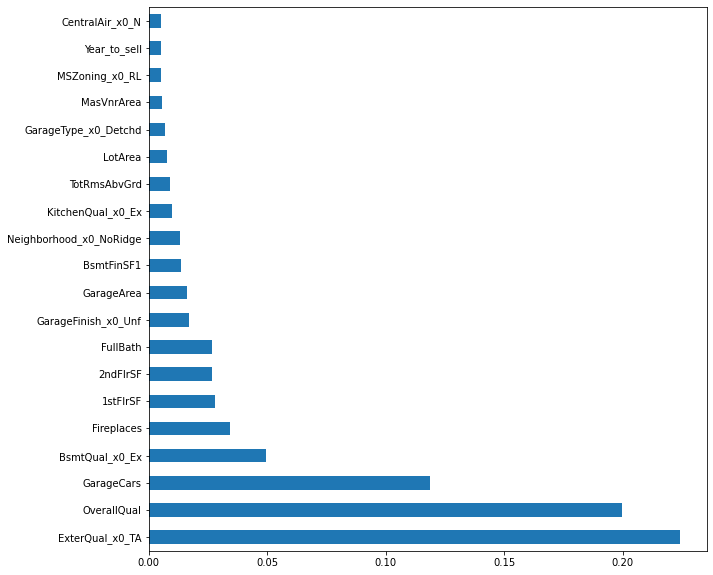

In [190]:
ranked_features = pd.Series(model.feature_importances_,index = X_train.columns)
plt.figure(figsize= (10,10))
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

## Decision Tree with GridSearch

In [193]:
dt = DecisionTreeRegressor()

dt_grid = GridSearchCV(dt,
                  param_grid = {'max_depth': range(4, 32, 4),
                                'min_samples_split': range(10, 60, 10),
                                "max_leaf_nodes" : [4,8,12,16,20,24,30],
                                "ccp_alpha" : [0.001,0.002,0.005,0.01,0.03,0.05,0.1,0.2]},
                  cv=5,
                  n_jobs=1)

dt_grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=1,
             param_grid={'ccp_alpha': [0.001, 0.002, 0.005, 0.01, 0.03, 0.05,
                                       0.1, 0.2],
                         'max_

In [194]:
print(dt_grid.best_params_)
print(-dt_grid.best_score_)

{'ccp_alpha': 0.03, 'max_depth': 8, 'max_leaf_nodes': 30, 'min_samples_split': 40}
-0.7279265392227671


In [195]:
train_pred = dt_grid.predict(X_train)
val_pred = dt_grid.predict(X_val)

In [196]:
scores = get_metrics(y_train,train_pred,y_val,val_pred,"DecisionTree_grid",scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE,Train_r2,Val_r2
0,Linear Regression,16426.355251,6.922144e+12,6.999539e+08,8.744685e+27,26456.641280,9.351302e+13,9.680859,4.782092e+09,0.890578,-1.450080e+18
1,DecisionTree,0.000000,2.772611e+04,0.000000e+00,1.768121e+09,0.000000,4.204903e+04,0.000000,1.527063e+01,1.000000,7.068028e-01
2,DecisionTree_grid,21046.191664,2.511799e+04,8.992626e+08,1.460804e+09,29987.707978,3.822047e+04,12.946556,1.426607e+01,0.859420,7.577634e-01


In [198]:
test_data_pred = dt_grid.predict(test_data)
d = pd.DataFrame(test_data_pred)
d.to_csv("/content/drive/MyDrive/Bootcamp/House_sales/submit_dt.csv")

##### PICKLE FILE

In [199]:
# save the model to disk
import pickle
filename = 'decision_tree.pkl'
pickle.dump(dt_grid, open(filename, 'wb'))

# RANDOM FOREST

In [200]:
#from sklearn.ensemble import RandomForestRegressor

In [201]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [204]:
## Predict
train_pred = rfr.predict(X_train)
val_pred = rfr.predict(X_val)

In [205]:
## Evaluation
scores = get_metrics(y_train,train_pred,y_val,val_pred,"RandomForest",scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE,Train_r2,Val_r2
0,Linear Regression,16426.355251,6.922144e+12,6.999539e+08,8.744685e+27,26456.641280,9.351302e+13,9.680859,4.782092e+09,0.890578,-1.450080e+18
1,DecisionTree,0.000000,2.772611e+04,0.000000e+00,1.768121e+09,0.000000,4.204903e+04,0.000000,1.527063e+01,1.000000,7.068028e-01
2,DecisionTree_grid,21046.191664,2.511799e+04,8.992626e+08,1.460804e+09,29987.707978,3.822047e+04,12.946556,1.426607e+01,0.859420,7.577634e-01
3,RandomForest,21046.191664,2.511799e+04,8.992626e+08,1.460804e+09,29987.707978,3.822047e+04,12.946556,1.426607e+01,0.859420,7.577634e-01
4,RandomForest,7015.173114,1.816878e+04,1.476490e+08,8.293076e+08,12151.090915,2.879770e+04,4.084259,1.041097e+01,0.976918,8.624808e-01


### Random Forest With RandomSearchCV

In [206]:
#from sklearn.model_selection import RandomizedSearchCV

In [207]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [208]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 31.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [209]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [210]:
## Predict
train_pred = rf_random.predict(X_train)
val_pred = rf_random.predict(X_val)

In [211]:
## Evaluation
scores = get_metrics(y_train,train_pred,y_val,val_pred,"RF_RandomCV",scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE,Train_r2,Val_r2
0,Linear Regression,16426.355251,6.922144e+12,6.999539e+08,8.744685e+27,26456.641280,9.351302e+13,9.680859,4.782092e+09,0.890578,-1.450080e+18
1,DecisionTree,0.000000,2.772611e+04,0.000000e+00,1.768121e+09,0.000000,4.204903e+04,0.000000,1.527063e+01,1.000000,7.068028e-01
2,DecisionTree_grid,21046.191664,2.511799e+04,8.992626e+08,1.460804e+09,29987.707978,3.822047e+04,12.946556,1.426607e+01,0.859420,7.577634e-01
3,RandomForest,21046.191664,2.511799e+04,8.992626e+08,1.460804e+09,29987.707978,3.822047e+04,12.946556,1.426607e+01,0.859420,7.577634e-01
4,RandomForest,7015.173114,1.816878e+04,1.476490e+08,8.293076e+08,12151.090915,2.879770e+04,4.084259,1.041097e+01,0.976918,8.624808e-01
5,RF_RandomCV,0.672374,1.671129e+04,1.172731e+01,7.807114e+08,3.424516,2.794121e+04,0.000436,9.817415e+00,1.000000,8.705392e-01


In [212]:
test_data_pred = rf_random.predict(test_data)
pred = pd.DataFrame(test_data_pred)
pred.to_csv("/content/drive/MyDrive/Bootcamp/House_sales/submit_rf_random.csv")

##### PICKLE FILE

In [213]:
# save the model to disk
import pickle
filename = 'rf_random.pkl'
pickle.dump(rf_random, open(filename, 'wb'))

### Random Forest with GridSearchCV

In [214]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15,20,25,40,80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [216]:
# Fit the grid search to the data
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed: 42.8min finished


{'bootstrap': True,
 'max_depth': 80,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

In [217]:
## Predict
train_pred = rf_grid.predict(X_train)
val_pred = rf_grid.predict(X_val)

In [218]:
## Evaluation
scores = get_metrics(y_train,train_pred,y_val,val_pred,"RF_GridCV",scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE,Train_r2,Val_r2
0,Linear Regression,16426.355251,6.922144e+12,6.999539e+08,8.744685e+27,26456.641280,9.351302e+13,9.680859,4.782092e+09,0.890578,-1.450080e+18
1,DecisionTree,0.000000,2.772611e+04,0.000000e+00,1.768121e+09,0.000000,4.204903e+04,0.000000,1.527063e+01,1.000000,7.068028e-01
2,DecisionTree_grid,21046.191664,2.511799e+04,8.992626e+08,1.460804e+09,29987.707978,3.822047e+04,12.946556,1.426607e+01,0.859420,7.577634e-01
3,RandomForest,21046.191664,2.511799e+04,8.992626e+08,1.460804e+09,29987.707978,3.822047e+04,12.946556,1.426607e+01,0.859420,7.577634e-01
4,RandomForest,7015.173114,1.816878e+04,1.476490e+08,8.293076e+08,12151.090915,2.879770e+04,4.084259,1.041097e+01,0.976918,8.624808e-01
5,RF_RandomCV,0.672374,1.671129e+04,1.172731e+01,7.807114e+08,3.424516,2.794121e+04,0.000436,9.817415e+00,1.000000,8.705392e-01
6,RF_GridCV,10586.518164,1.854154e+04,3.610101e+08,9.351406e+08,19000.266212,3.058007e+04,6.201510,1.048224e+01,0.943564,8.449311e-01


In [219]:
test_data_pred = rf_grid.predict(test_data)
pred = pd.DataFrame(test_data_pred)
pred.to_csv("/content/drive/MyDrive/Bootcamp/House_sales/submit_rf_grid.csv")

##### PICKLE FILE

In [220]:
# save the model to disk
import pickle
filename = 'rf_grid.pkl'
pickle.dump(rf_grid, open(filename, 'wb'))

# XGBOOST

In [175]:
#import xgboost as xgb
#from xgboost.sklearn import XGBRegressor

In [176]:
xgb = XGBRegressor(n_estimators=200, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.7)


In [177]:
xgb.fit(X_train,y_train)

[14:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [178]:
## Predict
train_pred = xgb.predict(X_train)
val_pred = xgb.predict(X_val)

In [179]:
## Evaluation
scores = get_metrics(y_train,train_pred,y_val,val_pred,"Xgboost",scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE,Train_r2,Val_r2
0,Xgboost,1024.812368,15961.002012,1.988416e+06,6.953985e+08,1410.111903,26370.410345,0.678439,8.997547,0.999689,0.884686


### XGBoost Hyper Parameter Tuning

In [176]:
xgb = XGBRegressor()
parameters = {'nthread':[4,6,8], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.1,0.01,.03, 0.05, .07], #so called `eta` value
              'max_depth': [4,6,8,10,15],
              'min_child_weight': [2,4,8],
              'subsample': [0.5,0.1,0.05,0.25],
              'colsample_bytree': [0.05,0.1,0.5,0.7],
              'n_estimators': [100,200,300,400,500]}

In [177]:
xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

In [178]:
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 18000 candidates, totalling 90000 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   50.9s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  3.2min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  5.2min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:  7.6min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed: 10.6min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed: 14.1min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 18.5min
[Parallel(n_jobs=5)]: Done 4990 tasks      | elapsed: 23.0min
[Parallel(n_jobs=5)]: Done 6040 tasks      | elapsed: 28.2min
[Parallel(n_jobs=5)]: Done 7190 tasks      | elapsed: 33.1min
[Parallel(n_jobs=5)]: Done 8440 tasks      | elapsed: 39.3min
[Parallel(n_jobs=5)]: Done 9790 tasks      | elapsed: 44.6min
[Parallel(n_jobs=5)]: Done 11240 tasks      | elapsed: 50.8mi

[09:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:12:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.05, 0.1, 0.5,

In [179]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.8651096778702628
{'colsample_bytree': 0.5, 'learning_rate': 0.07, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.25}


In [180]:
## Predict
train_pred = xgb_grid.predict(X_train)
val_pred = xgb_grid.predict(X_val)

In [181]:
## Evaluation
scores = get_metrics(y_train,train_pred,y_val,val_pred,"Xgboost_grid",scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE,Train_r2,Val_r2
0,Xgboost_grid,6619.685684,15877.034503,7.555429e+07,7.078751e+08,8692.197131,26605.922415,4.207382,9.032314,0.988189,0.882617


In [182]:
test_data_pred = xgb_grid.predict(test_data)
pred = pd.DataFrame(test_data_pred)
pred.to_csv("submit_xgb_grid.csv")

In [183]:
# save the model to disk
import pickle
filename = 'xgboost.pkl'
pickle.dump(xgb_grid, open(filename, 'wb'))

# KNN

In [184]:
#from sklearn.neighbors import KNeighborsRegressor

In [185]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [186]:
## Predict
train_pred = knn.predict(X_train)
val_pred = knn.predict(X_val)

In [187]:
## Evaluation
scores = get_metrics(y_train,train_pred,y_val,val_pred,"KNN",scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE,Train_r2,Val_r2
0,Xgboost_grid,6619.685684,15877.034503,7.555429e+07,7.078751e+08,8692.197131,26605.922415,4.207382,9.032314,0.988189,0.882617
1,KNN,17009.015342,20572.474521,8.904491e+08,1.122510e+09,29840.393945,33503.876725,9.495218,11.234066,0.860798,0.813861


### KNN Hyper Parameter Tuning

In [189]:
parameters = {'n_neighbors':list(range(2, 45))}

gs_knn = GridSearchCV(KNeighborsRegressor(n_jobs=-1), parameters, cv=3)

In [190]:
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(n_jobs=-1),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...]})

In [191]:
knn_model = gs_knn.best_estimator_
knn_model

KNeighborsRegressor(n_jobs=-1, n_neighbors=7)

In [192]:
print (gs_knn.best_score_, gs_knn.best_params_) 

0.7763631603778149 {'n_neighbors': 7}


In [193]:
## Predict
train_pred = gs_knn.predict(X_train)
val_pred = gs_knn.predict(X_val)

In [194]:
## Evaluation
scores = get_metrics(y_train,train_pred,y_val,val_pred,"KNN_grid",scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE,Train_r2,Val_r2
0,Xgboost_grid,6619.685684,15877.034503,7.555429e+07,7.078751e+08,8692.197131,26605.922415,4.207382,9.032314,0.988189,0.882617
1,KNN,17009.015342,20572.474521,8.904491e+08,1.122510e+09,29840.393945,33503.876725,9.495218,11.234066,0.860798,0.813861
2,KNN_grid,18028.061579,20613.473190,1.053483e+09,1.122135e+09,32457.399673,33498.289111,10.094316,11.367198,0.835312,0.813923


In [195]:
test_data_pred = gs_knn.predict(test_data)
pred = pd.DataFrame(test_data_pred)
pred.to_csv("knn_grid.csv")

In [196]:
# save the model to disk
import pickle
filename = 'knn.pkl'
pickle.dump(gs_knn, open(filename, 'wb'))

# Gradient Boosting

In [197]:
#from sklearn.ensemble import GradientBoostingRegressor

In [198]:
gbr = GradientBoostingRegressor(random_state = 0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [199]:
## Predict
train_pred = gbr.predict(X_train)
val_pred = gbr.predict(X_val)

In [200]:
## Evaluation
scores = get_metrics(y_train,train_pred,y_val,val_pred,"GradientBoosting",scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE,Train_r2,Val_r2
0,Xgboost_grid,6619.685684,15877.034503,7.555429e+07,7.078751e+08,8692.197131,26605.922415,4.207382,9.032314,0.988189,0.882617
1,KNN,17009.015342,20572.474521,8.904491e+08,1.122510e+09,29840.393945,33503.876725,9.495218,11.234066,0.860798,0.813861
2,KNN_grid,18028.061579,20613.473190,1.053483e+09,1.122135e+09,32457.399673,33498.289111,10.094316,11.367198,0.835312,0.813923
3,GradientBoosting,10538.154026,16845.137217,2.017661e+08,6.948677e+08,14204.439201,26360.342455,6.608815,9.456604,0.968458,0.884774


### Gradient Boosting Hyper Parameter Tuning

In [201]:
gbr = GradientBoostingRegressor()
search_grid = {'n_estimators':[500,1000,2000],
               'learning_rate':[.001,0.01,.1],
               'max_depth':[1,2,4],
               'subsample':[.5,.75,1],
               'random_state':[1]}

gbm_grid =GridSearchCV(estimator=gbr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=3)
gbm_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 4],
                         'n_estimators': [500, 1000, 2000], 'random_state': [1],
                         'subsample': [0.5, 0.75, 1]},
             scoring='neg_mean_squared_error')

In [202]:
## Predict
train_pred = gbm_grid.predict(X_train)
val_pred = gbm_grid.predict(X_val)

In [203]:
## Evaluation
scores = get_metrics(y_train,train_pred,y_val,val_pred,"GBM_Grid",scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE,Train_r2,Val_r2
0,Xgboost_grid,6619.685684,15877.034503,7.555429e+07,7.078751e+08,8692.197131,26605.922415,4.207382,9.032314,0.988189,0.882617
1,KNN,17009.015342,20572.474521,8.904491e+08,1.122510e+09,29840.393945,33503.876725,9.495218,11.234066,0.860798,0.813861
2,KNN_grid,18028.061579,20613.473190,1.053483e+09,1.122135e+09,32457.399673,33498.289111,10.094316,11.367198,0.835312,0.813923
3,GradientBoosting,10538.154026,16845.137217,2.017661e+08,6.948677e+08,14204.439201,26360.342455,6.608815,9.456604,0.968458,0.884774
4,GBM_Grid,5804.866865,16041.521306,5.337879e+07,6.294611e+08,7306.078636,25089.063640,3.768784,8.894055,0.991655,0.895620


In [204]:
test_data_pred = gbm_grid.predict(test_data)
pred = pd.DataFrame(test_data_pred)
pred.to_csv("gbm_grid.csv")

In [205]:
# save the model to disk
import pickle
filename = 'gbm.pkl'
pickle.dump(gbm_grid, open(filename, 'wb'))